In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
! pip install openpyxl

In [3]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px

In [4]:
#To display all columns
pd.set_option('display.max_columns', None)

In [5]:
#reaing the excel file 
df1=pd.read_excel('/Users/narasimhanaiduchikkala/Downloads/archive-2/Data_Train.xlsx')

In [6]:
#Displaying the top 5 rows
df1.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [7]:
df1.sample(10)

Airline Date_of_Journey    Source Destination  \
2633   Multiple carriers       6/03/2019     Delhi      Cochin   
1064              IndiGo       9/06/2019     Delhi      Cochin   
7981              IndiGo      21/05/2019     Delhi      Cochin   
10539          Air India       9/05/2019   Kolkata    Banglore   
3717         Jet Airways      21/05/2019     Delhi      Cochin   
8326            SpiceJet      15/05/2019  Banglore       Delhi   
2613         Jet Airways      21/05/2019     Delhi      Cochin   
7261         Jet Airways      21/05/2019     Delhi      Cochin   
6135         Jet Airways      24/06/2019     Delhi      Cochin   
9137         Jet Airways      12/03/2019  Banglore   New Delhi   

                             Route Dep_Time  Arrival_Time Duration  \
2633   DEL → GWL → IDR → BOM → COK    11:35         21:00   9h 25m   
1064               DEL → LKO → COK    21:50  03:35 10 Jun   5h 45m   
7981               DEL → BOM → COK    16:00         21:00       5h   
10539        CCU → BOM → GOI → BLR    16:50  05:35 10 May  12h 45m   
3717         DEL → AMD → BOM → COK    23:05  19:00 22 May  19h 55m   
8326                     BLR → DEL    05:55         08:35   2h 40m   
2613         DEL → AMD → BOM → COK    23:05  12:35 22 May  13h 30m   
7261                     DEL → COK    09:50         13:05   3h 15m   
6135         DEL → JAI → BOM → COK    09:40  12:35 25 Jun  26h 55m   
9137               BLR → BOM → DEL    22:55  10:45 13 Mar  11h 50m   

      Total_Stops              Additional_Info  Price  
2633      3 stops                      No info  21829  
1064       1 stop                      No info   6195  
7981       1 stop                      No info   7255  
10539     2 stops                      No info  11432  
3717      2 stops                      No info  15129  
8326     non-stop                      No info   3311  
2613      2 stops                      No info  15129  
7261     non-stop                      No info   9564  
6135      2 stops                      No info  13014  
9137       1 stop  In-flight meal not included  11087

In [8]:
df1['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [9]:
df1.shape

(10683, 11)

In [10]:
#to check if there are any null values in the data
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
#To display the statistics like mean, std.dev and max
df1.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [13]:
#Dropping the null values
df1.dropna(inplace=True)

In [14]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
#check for duplicates and drop them.
df1.duplicated().sum()

220

In [16]:
#dropping the duplicate values
df1.drop_duplicates(inplace=True)

In [17]:
df1.shape

(10462, 11)

In [18]:
#converting to date time format
df1['Date_of_Journey'] = pd.to_datetime(df1['Date_of_Journey'],dayfirst=True)

In [19]:
df1['Date_of_Journey']

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
10678   2019-04-09
10679   2019-04-27
10680   2019-04-27
10681   2019-03-01
10682   2019-05-09
Name: Date_of_Journey, Length: 10462, dtype: datetime64[ns]

In [20]:
#changing the date time into day format.
df1['Journey_Day'] = df1['Date_of_Journey'].dt.day

In [21]:
#changing the date time into month format.
df1['Journey_Month']=df1['Date_of_Journey'].dt.month

In [22]:
#changing the date time into 
df1['Journey_Year']=df1['Date_of_Journey'].dt.year

In [23]:
df1['Dep_Time'] = pd.to_datetime(df1['Dep_Time'],infer_datetime_format=True)

In [24]:
#splitting departure time into hour and minutes
df1['Departure_Hour'] = df1['Dep_Time'].dt.hour
df1['Departure_Minute'] = df1['Dep_Time'].dt.minute

In [25]:
df1['Departure_Minute']

0        20
1        50
2        25
3         5
4        50
         ..
10678    55
10679    45
10680    20
10681    30
10682    55
Name: Departure_Minute, Length: 10462, dtype: int64

In [26]:
df1.drop('Dep_Time', axis=1, inplace=True)

In [27]:
#converting to date time format
df1['Arrival_Time'] = pd.to_datetime(df1['Arrival_Time'])

In [28]:
#splitting arrival time into hour and minutes
df1['Arrival_Hour'] = df1['Arrival_Time'].dt.hour
df1['Arrival_Minute'] =df1['Arrival_Time'].dt.minute

In [29]:
df1.drop('Arrival_Time', axis=1, inplace=True)

In [30]:
df1

Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore   New Delhi   
1        Air India      2019-05-01   Kolkata    Banglore   
2      Jet Airways      2019-06-09     Delhi      Cochin   
3           IndiGo      2019-05-12   Kolkata    Banglore   
4           IndiGo      2019-03-01  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      2019-04-09   Kolkata    Banglore   
10679    Air India      2019-04-27   Kolkata    Banglore   
10680  Jet Airways      2019-04-27  Banglore       Delhi   
10681      Vistara      2019-03-01  Banglore   New Delhi   
10682    Air India      2019-05-09     Delhi      Cochin   

                       Route Duration Total_Stops Additional_Info  Price  \
0                  BLR → DEL   2h 50m    non-stop         No info   3897   
1      CCU → IXR → BBI → BLR   7h 25m     2 stops         No info   7662   
2      DEL → LKO → BOM → COK      19h     2 stops         No info  13882   
3            CCU → NAG → BLR   5h 25m      1 stop         No info   6218   
4            BLR → NAG → DEL   4h 45m      1 stop         No info  13302   
...                      ...      ...         ...             ...    ...   
10678              CCU → BLR   2h 30m    non-stop         No info   4107   
10679              CCU → BLR   2h 35m    non-stop         No info   4145   
10680              BLR → DEL       3h    non-stop         No info   7229   
10681              BLR → DEL   2h 40m    non-stop         No info  12648   
10682  DEL → GOI → BOM → COK   8h 20m     2 stops         No info  11753   

       Journey_Day  Journey_Month  Journey_Year  Departure_Hour  \
0               24              3          2019              22   
1                1              5          2019               5   
2                9              6          2019               9   
3               12              5          2019              18   
4                1              3          2019              16   
...            ...            ...           ...             ...   
10678            9              4          2019              19   
10679           27              4          2019              20   
10680           27              4          2019               8   
10681            1              3          2019              11   
10682            9              5          2019              10   

       Departure_Minute  Arrival_Hour  Arrival_Minute  
0                    20             1              10  
1                    50            13              15  
2                    25             4              25  
3                     5            23              30  
4                    50            21              35  
...                 ...           ...             ...  
10678                55            22              25  
10679                45            23              20  
10680                20            11              20  
10681                30            14              10  
10682                55            19              15  

[10462 rows x 16 columns]

In [31]:
#Count of Differnt flight routes
df1['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

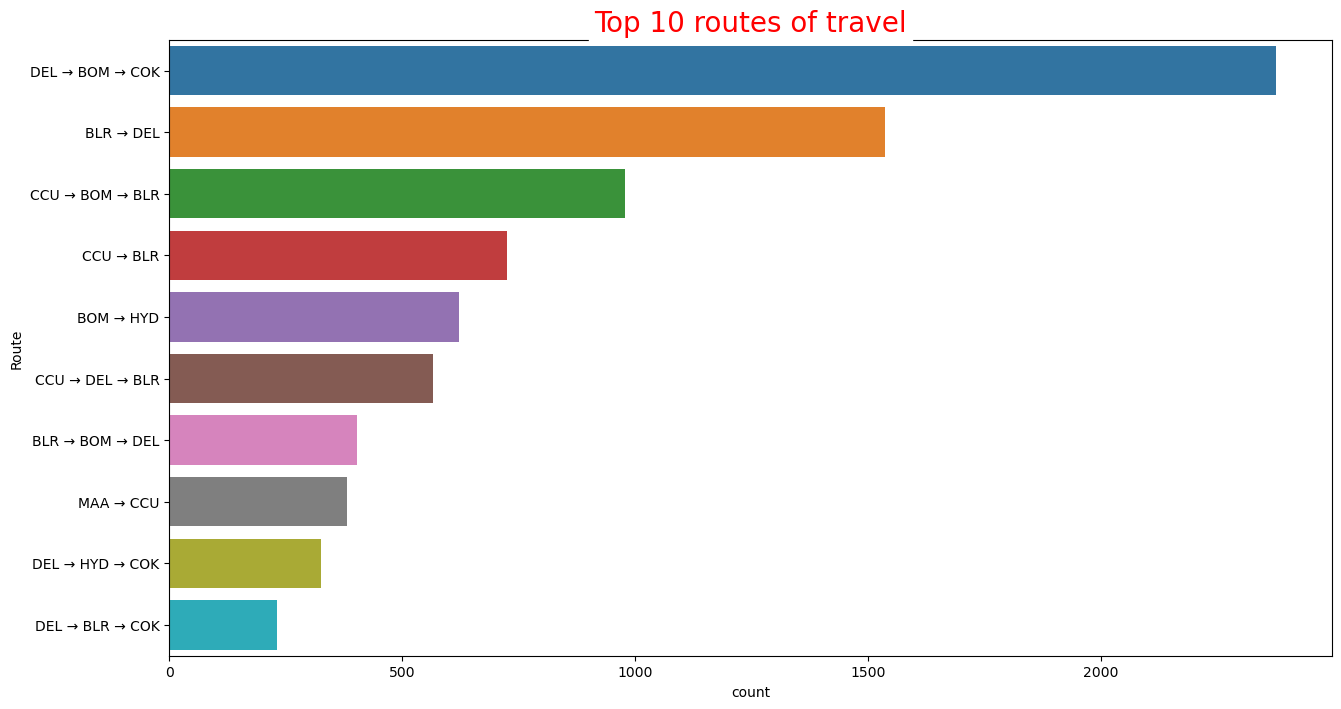

In [32]:
plt.figure(figsize=(15,8))
r=sns.countplot(y='Route',data=df1, order = df1['Route'].value_counts()[:10].index)
plt.title("Top 10 routes of travel",
          fontsize='20',
          backgroundcolor='white',
          color='red');

In [33]:
df1['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [34]:
df1['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

[Text(0.5, 1.0, 'Number of stops')]

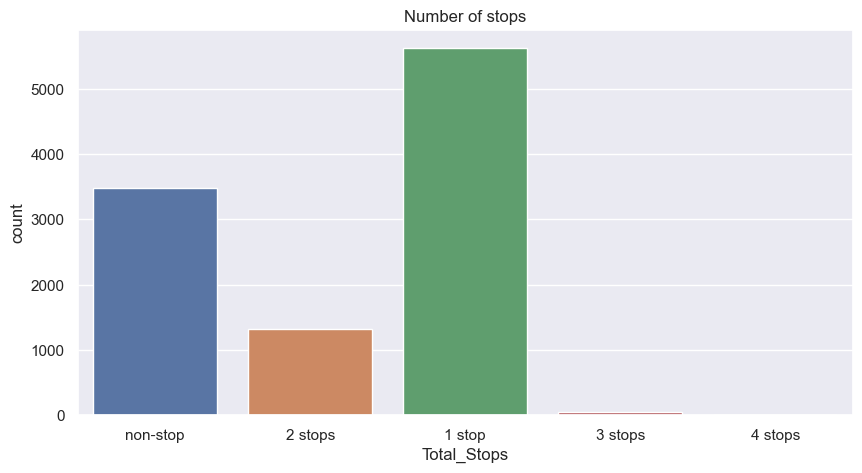

In [35]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.countplot(x=df1.Total_Stops).set(title='Number of stops')

In [36]:
df1['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [37]:
df1['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

There are delhi and New Delhi both are same so replacing new delhi with delhi

In [38]:
df1['Destination'] = df1['Destination'].replace('New Delhi','Delhi')

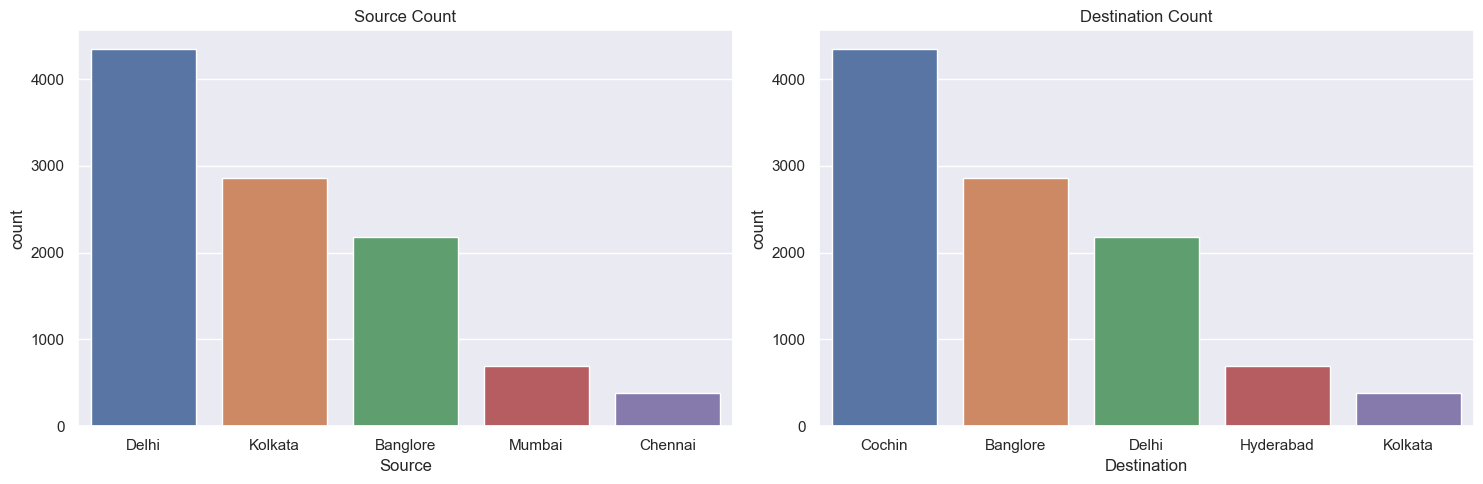

In [39]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
sns.countplot(x='Source',data=df1, order = df1['Source'].value_counts().index,ax=ax[0]).set(title='Source Count')
sns.countplot(x='Destination',data=df1, order = df1['Destination'].value_counts().index,ax=ax[1]).set(title='Destination Count')

plt.tight_layout();

Reference:https://www.statology.org/seaborn-subplots/

In [40]:
fig = px.box(df1, x="Destination", y="Price")
fig.update_layout(title_text="Prices to different destinations")
fig.show()

Reference: https://plotly.com/python/box-plots/

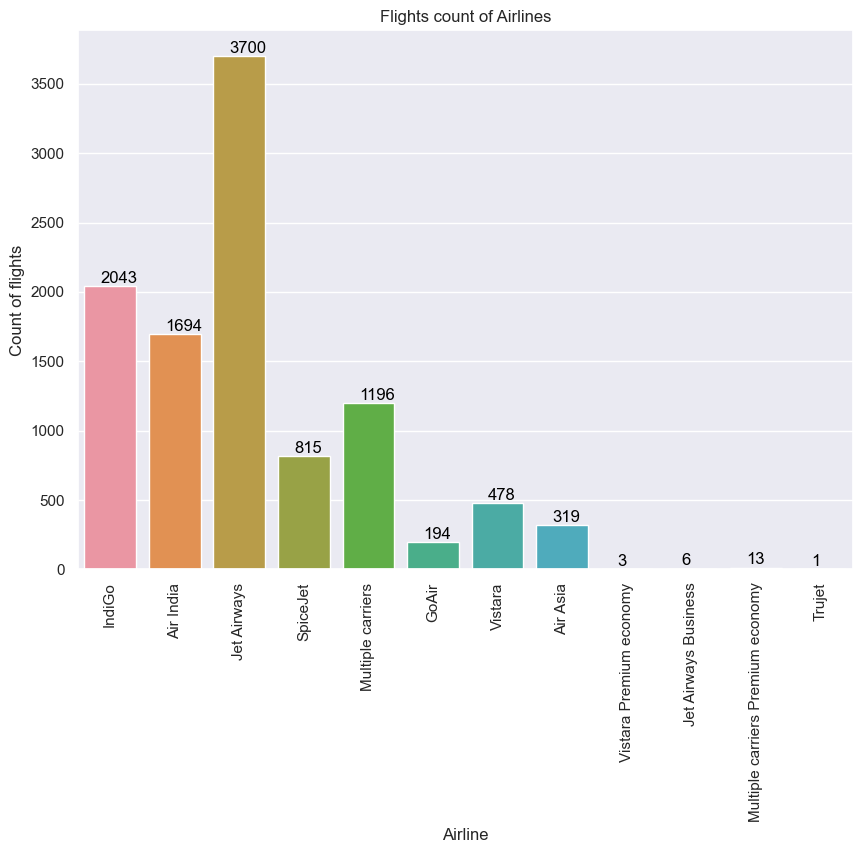

In [41]:
plt.figure(figsize = (10, 7))
plt.title('Flights count of Airlines')
ax=sns.countplot(x = 'Airline', data =df1)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

Reference: https://www.tutorialspoint.com/matplotlib-how-to-show-the-count-values-on-the-top-of-a-bar-in-a-countplot

In [42]:
df1['Date_of_Journey'].value_counts()

2019-06-06    490
2019-05-18    486
2019-06-09    485
2019-06-12    483
2019-05-21    482
2019-05-09    466
2019-03-21    412
2019-05-15    402
2019-03-06    397
2019-05-27    369
2019-06-27    339
2019-06-24    330
2019-06-01    330
2019-06-03    326
2019-03-24    314
2019-06-15    314
2019-03-03    309
2019-03-09    299
2019-03-27    290
2019-05-24    286
2019-05-06    281
2019-05-01    274
2019-05-12    259
2019-04-01    256
2019-03-01    198
2019-03-15    162
2019-03-18    156
2019-03-12    141
2019-04-09    125
2019-04-03    110
2019-06-21    109
2019-06-18    105
2019-04-06    100
2019-04-27     94
2019-04-24     92
2019-05-03     90
2019-04-15     89
2019-04-21     82
2019-04-18     67
2019-04-12     63
Name: Date_of_Journey, dtype: int64

Text(0, 0.5, 'No of Flights')

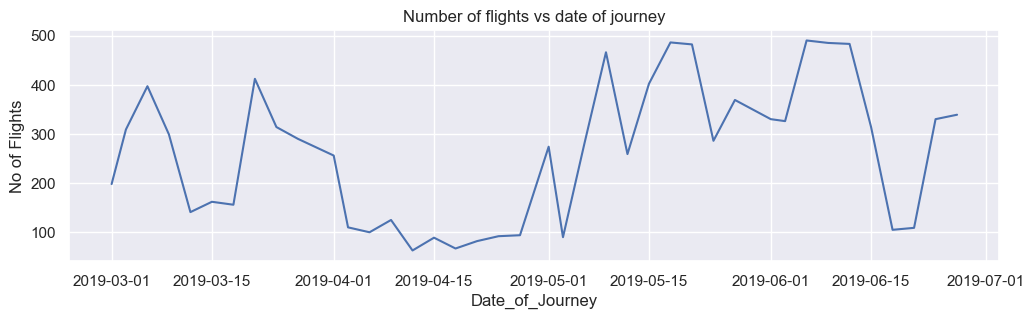

In [43]:
#line plot for number of flights on particular day
sns.set(rc={'figure.figsize':(12,3)})
date_count = df1[df1['Price'].notnull()].groupby('Date_of_Journey').count().reset_index()
g = sns.lineplot(data=date_count, x="Date_of_Journey", y="Airline")
g.set_title('Number of flights vs date of journey')
g.set_ylabel('No of Flights')

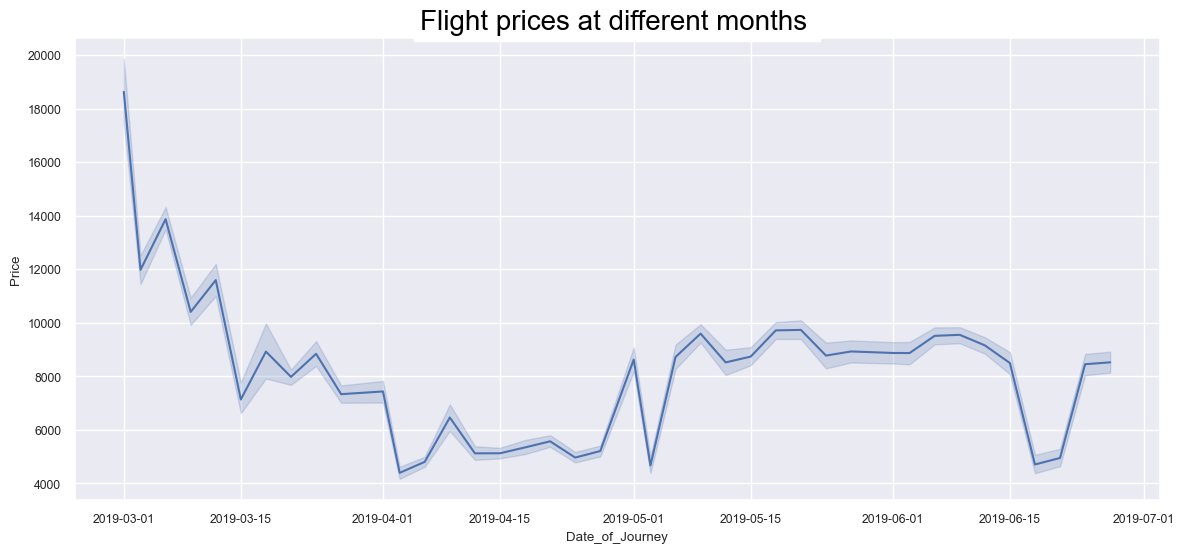

In [44]:
#Line plot of flight prices 
sns.set(rc={'figure.figsize':(14,6)})
sns.set(font_scale=0.8)
avg_air_price_time = df1.groupby(['Airline','Date_of_Journey']).mean('Price').reset_index()
sns.lineplot(x="Date_of_Journey", y="Price", data=df1[df1['Airline'] != 'Jet Airways Business'])
plt.title("Flight prices at different months ",fontsize='20',backgroundcolor='white',color='Black');

Reference:https://seaborn.pydata.org/generated/seaborn.lineplot.html
        

In [45]:
#Finding Flights from banglore to delhi on march 1st 2019
source_filt=((df1['Source']=='Banglore')&(df1['Destination']=='Delhi')&(df1['Date_of_Journey']=='2019-03-01'))
df1.loc[source_filt]

Airline Date_of_Journey    Source Destination  \
4           IndiGo      2019-03-01  Banglore       Delhi   
7      Jet Airways      2019-03-01  Banglore       Delhi   
56       Air India      2019-03-01  Banglore       Delhi   
353      Air India      2019-03-01  Banglore       Delhi   
486    Jet Airways      2019-03-01  Banglore       Delhi   
...            ...             ...       ...         ...   
10383  Jet Airways      2019-03-01  Banglore       Delhi   
10439  Jet Airways      2019-03-01  Banglore       Delhi   
10511    Air India      2019-03-01  Banglore       Delhi   
10561  Jet Airways      2019-03-01  Banglore       Delhi   
10681      Vistara      2019-03-01  Banglore       Delhi   

                       Route Duration Total_Stops Additional_Info  Price  \
4            BLR → NAG → DEL   4h 45m      1 stop         No info  13302   
7            BLR → BOM → DEL   21h 5m      1 stop         No info  22270   
56     BLR → BOM → AMD → DEL   15h 5m     2 stops         No info  17345   
353          BLR → CCU → DEL  22h 10m      1 stop         No info  13439   
486          BLR → BOM → DEL   6h 20m      1 stop         No info  26890   
...                      ...      ...         ...             ...    ...   
10383        BLR → BOM → DEL   22h 5m      1 stop         No info  26890   
10439        BLR → BOM → DEL  14h 20m      1 stop         No info  31825   
10511  BLR → BOM → BHO → DEL  26h 40m     2 stops  2 Long layover  26480   
10561        BLR → BOM → DEL  18h 55m      1 stop         No info  20800   
10681              BLR → DEL   2h 40m    non-stop         No info  12648   

       Journey_Day  Journey_Month  Journey_Year  Departure_Hour  \
4                1              3          2019              16   
7                1              3          2019               8   
56               1              3          2019               8   
353              1              3          2019              11   
486              1              3          2019               8   
...            ...            ...           ...             ...   
10383            1              3          2019               7   
10439            1              3          2019              18   
10511            1              3          2019               6   
10561            1              3          2019              14   
10681            1              3          2019              11   

       Departure_Minute  Arrival_Hour  Arrival_Minute  
4                    50            21              35  
7                     0             5               5  
56                   50            23              55  
353                   5             9              15  
486                  55            15              15  
...                 ...           ...             ...  
10383                 0             5               5  
10439                40             9               0  
10511                45             9              25  
10561                 5             9               0  
10681                30            14              10  

[151 rows x 16 columns]

In [46]:
(df1.loc[source_filt,['Date_of_Journey','Airline','Duration','Total_Stops','Price']])

Date_of_Journey      Airline Duration Total_Stops  Price
4          2019-03-01       IndiGo   4h 45m      1 stop  13302
7          2019-03-01  Jet Airways   21h 5m      1 stop  22270
56         2019-03-01    Air India   15h 5m     2 stops  17345
353        2019-03-01    Air India  22h 10m      1 stop  13439
486        2019-03-01  Jet Airways   6h 20m      1 stop  26890
...               ...          ...      ...         ...    ...
10383      2019-03-01  Jet Airways   22h 5m      1 stop  26890
10439      2019-03-01  Jet Airways  14h 20m      1 stop  31825
10511      2019-03-01    Air India  26h 40m     2 stops  26480
10561      2019-03-01  Jet Airways  18h 55m      1 stop  20800
10681      2019-03-01      Vistara   2h 40m    non-stop  12648

[151 rows x 5 columns]

In [47]:
#Adding the condition of nonstop flights with duration less than 4h 45min
data_query = df1[(df1['Total_Stops'] == 'non-stop') & (df1['Duration'] <= '4h 45m')]
p=(data_query.loc[source_filt,['Airline','Date_of_Journey','Source','Destination','Departure_Hour','Departure_Minute','Duration','Total_Stops','Price']])
p

Airline Date_of_Journey    Source Destination  Departure_Hour  \
1497         GoAir      2019-03-01  Banglore       Delhi               7   
1887        IndiGo      2019-03-01  Banglore       Delhi              20   
1959         GoAir      2019-03-01  Banglore       Delhi              11   
2085        IndiGo      2019-03-01  Banglore       Delhi              18   
2581     Air India      2019-03-01  Banglore       Delhi               6   
3543        IndiGo      2019-03-01  Banglore       Delhi              10   
4012     Air India      2019-03-01  Banglore       Delhi              17   
4198      SpiceJet      2019-03-01  Banglore       Delhi               9   
4668        IndiGo      2019-03-01  Banglore       Delhi               7   
5162       Vistara      2019-03-01  Banglore       Delhi              21   
5387         GoAir      2019-03-01  Banglore       Delhi              20   
5964      Air Asia      2019-03-01  Banglore       Delhi               5   
6487   Jet Airways      2019-03-01  Banglore       Delhi              19   
6526       Vistara      2019-03-01  Banglore       Delhi               7   
6558        IndiGo      2019-03-01  Banglore       Delhi              22   
6579        IndiGo      2019-03-01  Banglore       Delhi              23   
7137        IndiGo      2019-03-01  Banglore       Delhi              21   
7826        IndiGo      2019-03-01  Banglore       Delhi               8   
8122      Air Asia      2019-03-01  Banglore       Delhi              23   
8308        IndiGo      2019-03-01  Banglore       Delhi              18   
8715        IndiGo      2019-03-01  Banglore       Delhi              16   
8937        IndiGo      2019-03-01  Banglore       Delhi              13   
8940     Air India      2019-03-01  Banglore       Delhi              21   
9303       Vistara      2019-03-01  Banglore       Delhi              19   
9546     Air India      2019-03-01  Banglore       Delhi              13   
10681      Vistara      2019-03-01  Banglore       Delhi              11   

       Departure_Minute Duration Total_Stops  Price  
1497                 45   2h 55m    non-stop  13663  
1887                  0   2h 55m    non-stop  14306  
1959                 40   2h 55m    non-stop  11111  
2085                 55   2h 50m    non-stop  14306  
2581                 10   2h 45m    non-stop  15676  
3543                  5   2h 55m    non-stop  10067  
4012                  0   2h 45m    non-stop  25913  
4198                 35   2h 55m    non-stop  11690  
4668                 10   2h 55m    non-stop  11934  
5162                 10   2h 55m    non-stop  21730  
5387                 55   2h 55m    non-stop  18558  
5964                 50   2h 50m    non-stop  10715  
6487                 55   2h 40m    non-stop  18308  
6526                  0   2h 40m    non-stop  21520  
6558                 20   2h 50m    non-stop  11934  
6579                 30   2h 50m    non-stop  10067  
7137                 20   2h 55m    non-stop  12649  
7826                 30       3h    non-stop  10067  
8122                 25   2h 45m    non-stop  10873  
8308                 25   2h 55m    non-stop  12649  
8715                 55   2h 50m    non-stop  12649  
8937                  0   2h 50m    non-stop  19685  
8940                 10   2h 45m    non-stop  25703  
9303                 40   2h 40m    non-stop  21730  
9546                 20   2h 50m    non-stop  12526  
10681                30   2h 40m    non-stop  12648

In [48]:
#These are details of flights from banglore to delhi with less duration and no stops.
p.sort_values("Duration")

Airline Date_of_Journey    Source Destination  Departure_Hour  \
6487   Jet Airways      2019-03-01  Banglore       Delhi              19   
9303       Vistara      2019-03-01  Banglore       Delhi              19   
6526       Vistara      2019-03-01  Banglore       Delhi               7   
10681      Vistara      2019-03-01  Banglore       Delhi              11   
2581     Air India      2019-03-01  Banglore       Delhi               6   
8940     Air India      2019-03-01  Banglore       Delhi              21   
4012     Air India      2019-03-01  Banglore       Delhi              17   
8122      Air Asia      2019-03-01  Banglore       Delhi              23   
8937        IndiGo      2019-03-01  Banglore       Delhi              13   
8715        IndiGo      2019-03-01  Banglore       Delhi              16   
6579        IndiGo      2019-03-01  Banglore       Delhi              23   
2085        IndiGo      2019-03-01  Banglore       Delhi              18   
6558        IndiGo      2019-03-01  Banglore       Delhi              22   
5964      Air Asia      2019-03-01  Banglore       Delhi               5   
9546     Air India      2019-03-01  Banglore       Delhi              13   
1959         GoAir      2019-03-01  Banglore       Delhi              11   
5387         GoAir      2019-03-01  Banglore       Delhi              20   
7137        IndiGo      2019-03-01  Banglore       Delhi              21   
5162       Vistara      2019-03-01  Banglore       Delhi              21   
8308        IndiGo      2019-03-01  Banglore       Delhi              18   
4668        IndiGo      2019-03-01  Banglore       Delhi               7   
4198      SpiceJet      2019-03-01  Banglore       Delhi               9   
3543        IndiGo      2019-03-01  Banglore       Delhi              10   
1887        IndiGo      2019-03-01  Banglore       Delhi              20   
1497         GoAir      2019-03-01  Banglore       Delhi               7   
7826        IndiGo      2019-03-01  Banglore       Delhi               8   

       Departure_Minute Duration Total_Stops  Price  
6487                 55   2h 40m    non-stop  18308  
9303                 40   2h 40m    non-stop  21730  
6526                  0   2h 40m    non-stop  21520  
10681                30   2h 40m    non-stop  12648  
2581                 10   2h 45m    non-stop  15676  
8940                 10   2h 45m    non-stop  25703  
4012                  0   2h 45m    non-stop  25913  
8122                 25   2h 45m    non-stop  10873  
8937                  0   2h 50m    non-stop  19685  
8715                 55   2h 50m    non-stop  12649  
6579                 30   2h 50m    non-stop  10067  
2085                 55   2h 50m    non-stop  14306  
6558                 20   2h 50m    non-stop  11934  
5964                 50   2h 50m    non-stop  10715  
9546                 20   2h 50m    non-stop  12526  
1959                 40   2h 55m    non-stop  11111  
5387                 55   2h 55m    non-stop  18558  
7137                 20   2h 55m    non-stop  12649  
5162                 10   2h 55m    non-stop  21730  
8308                 25   2h 55m    non-stop  12649  
4668                 10   2h 55m    non-stop  11934  
4198                 35   2h 55m    non-stop  11690  
3543                  5   2h 55m    non-stop  10067  
1887                  0   2h 55m    non-stop  14306  
1497                 45   2h 55m    non-stop  13663  
7826                 30       3h    non-stop  10067

We can see the price of these very high because these flights are non stop. So, number of stops have huge impact on price.

Airline
Air India      19954.500000
Vistara        19407.000000
Jet Airways    18308.000000
GoAir          14444.000000
IndiGo         12755.727273
SpiceJet       11690.000000
Air Asia       10794.000000
Name: Price, dtype: float64


<Axes: xlabel='Airline'>

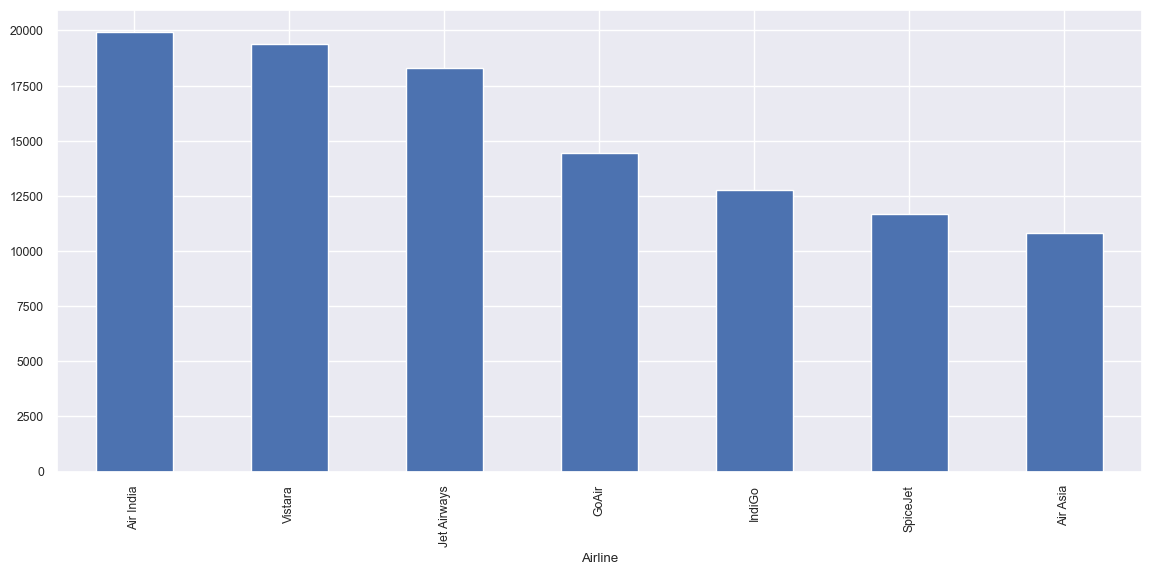

In [49]:
#This is the mean flight fare price for banglore to delhi with different airline on jan 3rd 2019
print(p.groupby('Airline')['Price'].mean().sort_values(ascending = False))
p.groupby('Airline')['Price'].mean().sort_values(ascending = False).plot(kind = 'bar') 

In [50]:
df_bom_hyd= df1[df1['Route']=='BOM → HYD']

Airline
Jet Airways    5322.975845
IndiGo         3639.194872
Air India      3448.704082
SpiceJet       2419.859504
Name: Price, dtype: float64


<Axes: ylabel='Airline'>

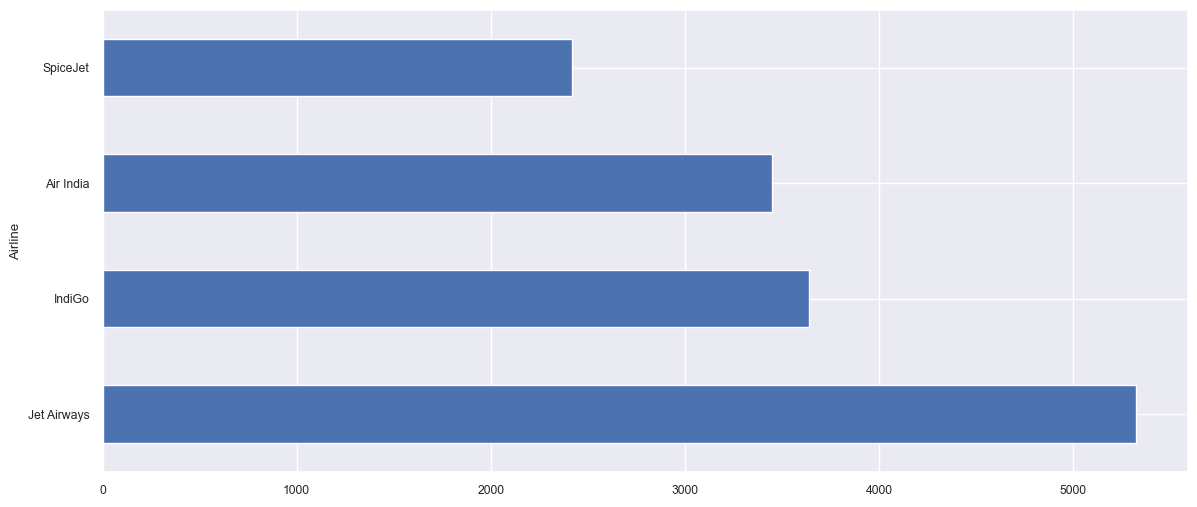

In [51]:
#Mean flight prices for all flights from 
print(df_bom_hyd.groupby('Airline')['Price'].mean().sort_values(ascending = False)  )
df_bom_hyd.groupby('Airline')['Price'].mean().sort_values(ascending = False).plot(kind = 'barh') 

In [52]:
#Converting the duration into hour and minutes
df1['Duration_Hour']=df1['Duration'].str.split('h').str[0].replace(['h'],'')
df1['Duration_Minute']=df1['Duration'].str.split('h').str[1].replace(['m'],'')
df1['Duration_Minute']=df1['Duration_Minute'].str[:-1]

In [53]:
#We have 5m i.e 5 minutes which is an error in hour.
df1['Duration_Hour'].value_counts()

2     2387
1      621
3      500
7      487
5      481
9      445
12     426
8      424
13     381
11     365
10     355
6      340
14     337
15     262
23     240
16     234
4      222
26     214
24     195
25     183
22     181
27     174
21     172
20     161
18     130
17     128
19     125
28      93
29      50
30      49
38      31
37      17
33      10
32       9
34       7
35       7
31       6
36       5
47       2
42       2
39       1
5m       1
41       1
40       1
Name: Duration_Hour, dtype: int64

In [54]:
#we need drop this row with duration of 5 minutes
df1[df1['Duration_Hour']=='5m']  

Airline Date_of_Journey  Source Destination                  Route  \
6474  Air India      2019-03-06  Mumbai   Hyderabad  BOM → GOI → PNQ → HYD   

     Duration Total_Stops Additional_Info  Price  Journey_Day  Journey_Month  \
6474       5m     2 stops         No info  17327            6              3   

      Journey_Year  Departure_Hour  Departure_Minute  Arrival_Hour  \
6474          2019              16                50            16   

      Arrival_Minute Duration_Hour Duration_Minute  
6474              55            5m             NaN

In [55]:
df1.drop(df1[df1['Duration_Hour']=='5m'].index,inplace=True)

In [56]:
df1['Duration_Hour']=df1['Duration_Hour'].astype(int)

In [57]:
#filling 0 in minutes if there is no value.
df1['Duration_Minute'].replace('',np.nan,inplace=True)
df1['Duration_Minute'].fillna(0,inplace=True)
df1['Duration_Minute']=df1['Duration_Minute'].astype(int)

In [58]:
#Converting the entire duration into only minutes
def convert_to_minutes(h):
    if h>12:
        return (h-12)*60
    else:
        return h*60
    
df1['Duration_Hour']=df1['Duration_Hour'].apply(convert_to_minutes)
df1['Total_Duration_Minute']=df1['Duration_Hour']+df1['Duration_Minute']
df1.drop(columns=['Duration_Hour','Duration','Duration_Minute'],inplace=True)
df1.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore       Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore       Delhi        BLR → NAG → DEL   

  Total_Stops Additional_Info  Price  Journey_Day  Journey_Month  \
0    non-stop         No info   3897           24              3   
1     2 stops         No info   7662            1              5   
2     2 stops         No info  13882            9              6   
3      1 stop         No info   6218           12              5   
4      1 stop         No info  13302            1              3   

   Journey_Year  Departure_Hour  Departure_Minute  Arrival_Hour  \
0          2019              22                20             1   
1          2019               5                50            13   
2          2019               9                25             4   
3          2019              18                 5            23   
4          2019              16                50            21   

   Arrival_Minute  Total_Duration_Minute  
0              10                    170  
1              15                    445  
2              25                    420  
3              30                    325  
4              35                    285

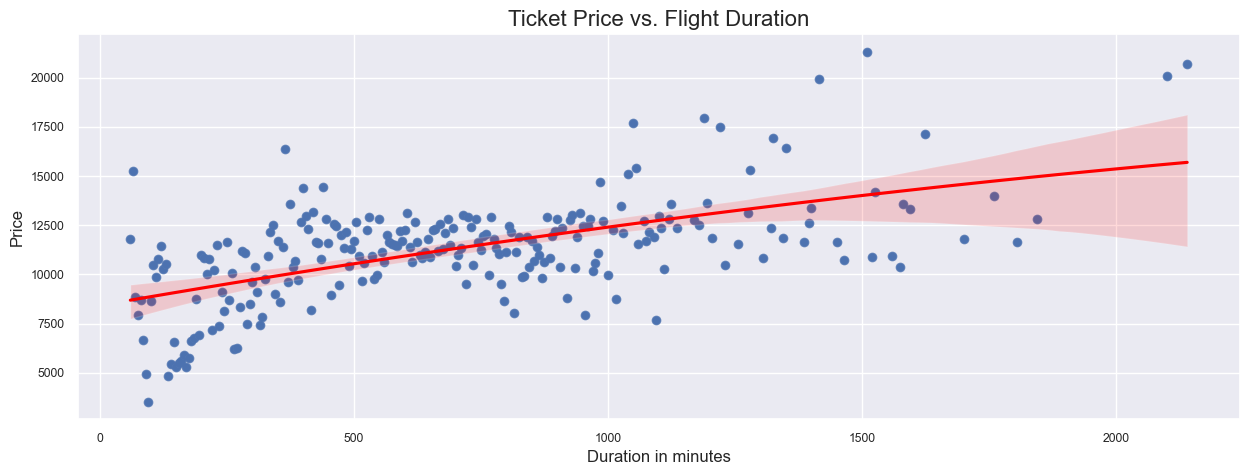

In [59]:
#Finding Correlation between Duration & Price with regplot
dfduration = df1.groupby(['Total_Duration_Minute'])['Price'].mean().reset_index()
plt.figure(figsize=(15,5))
sns.scatterplot(data=dfduration, x="Total_Duration_Minute", y="Price")
sns.regplot(data=dfduration, x="Total_Duration_Minute", y="Price", order=2,line_kws = {"color": "red"})
plt.title('Ticket Price vs. Flight Duration',fontsize=16)
plt.xlabel('Duration in minutes',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

Reference: https://www.geeksforgeeks.org/python-seaborn-regplot-method/

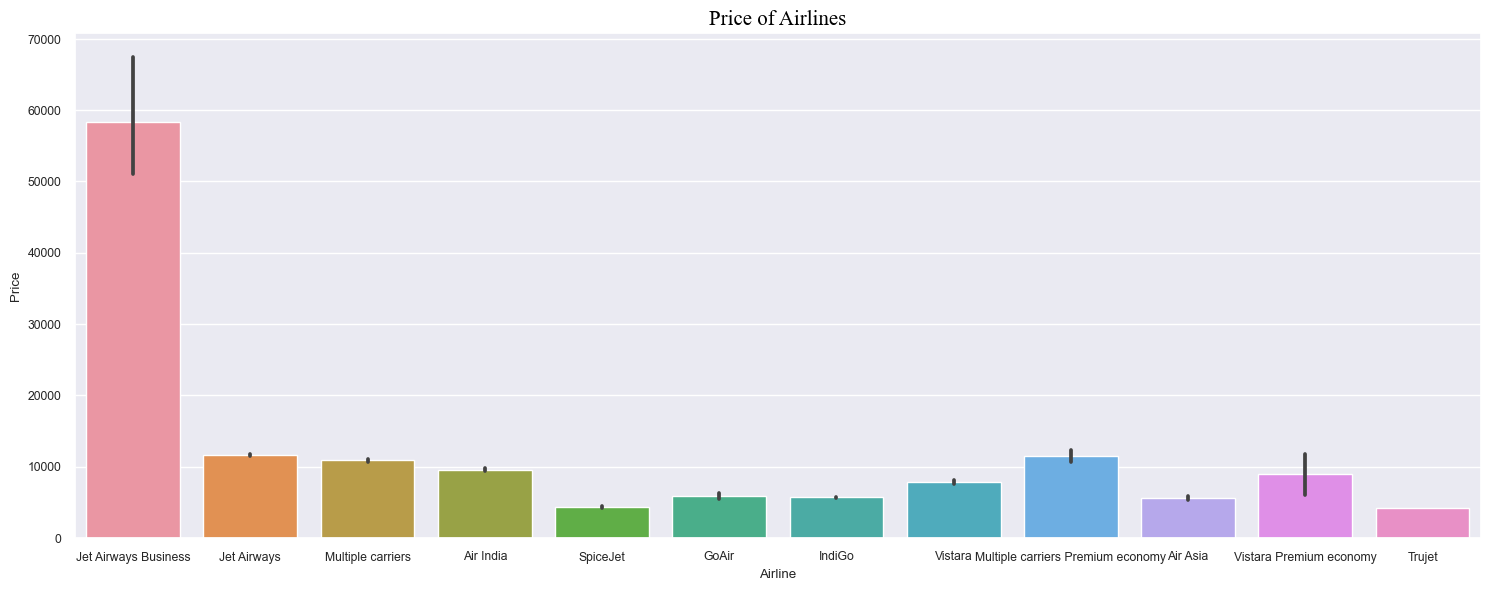

In [60]:
plt.figure(figsize=(15,6))
sns.barplot(x='Airline',y='Price',data=df1.sort_values('Price',ascending=False))
font_style={'family':'times new roman','size':15,'color':'black'}
plt.title("Price of Airlines",fontdict=font_style)
plt.tight_layout()

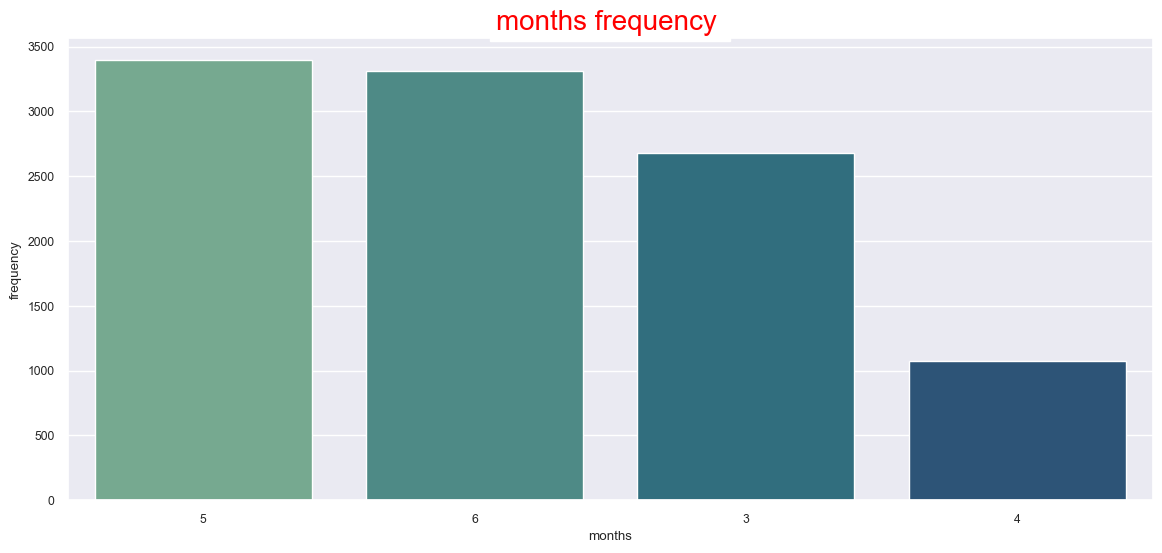

In [61]:
chart=sns.countplot(x='Journey_Month',data=df1,palette='crest', order = df1['Journey_Month'].value_counts().index)
plt.xlabel('months')
plt.ylabel('frequency')
plt.title("months frequency ",
          fontsize='20',
          backgroundcolor='white',
          color='red')
chart.set_xticklabels(chart.get_xticklabels(),rotation=360);

In [62]:
days_df = df1[['Airline','Date_of_Journey', 'Price']].copy()
days_df.head()

Airline Date_of_Journey  Price
0       IndiGo      2019-03-24   3897
1    Air India      2019-05-01   7662
2  Jet Airways      2019-06-09  13882
3       IndiGo      2019-05-12   6218
4       IndiGo      2019-03-01  13302

In [63]:
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'],format='%d/%m/%Y')
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day: 1 if day == 'Sunday' else 0)
days_df.head()

Airline Date_of_Journey  Price    Weekday  Weekend
0       IndiGo      2019-03-24   3897     Sunday        1
1    Air India      2019-05-01   7662  Wednesday        0
2  Jet Airways      2019-06-09  13882     Sunday        1
3       IndiGo      2019-05-12   6218     Sunday        1
4       IndiGo      2019-03-01  13302     Friday        0

<Figure size 4200x1800 with 0 Axes>

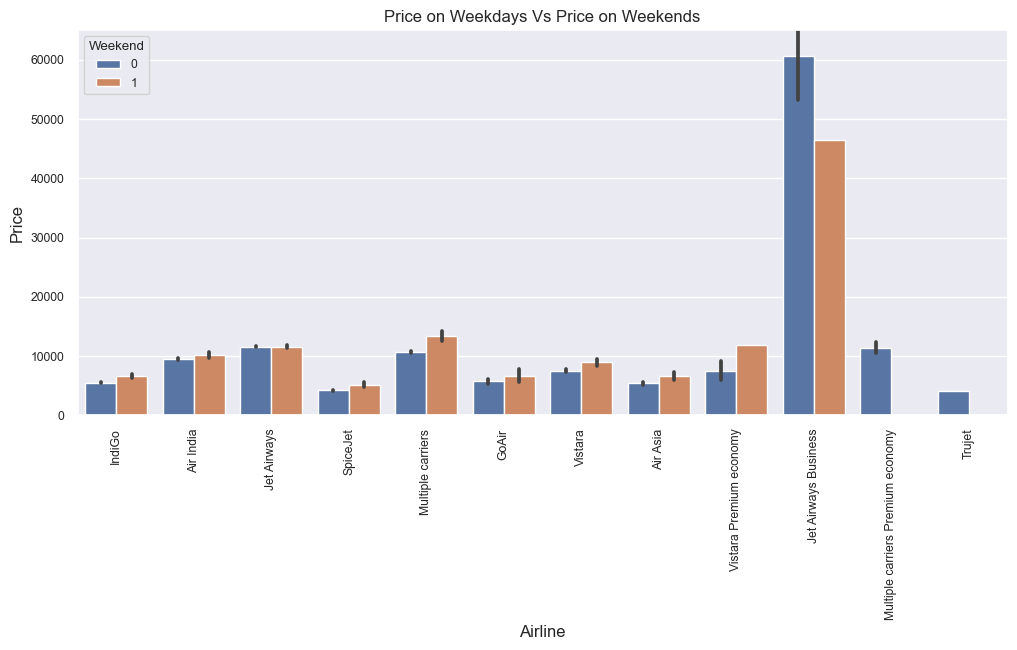

In [64]:
plt.figure(dpi=300)
plt.subplots(figsize=(12,5))
sns.barplot(data=days_df,x='Airline',y='Price',hue='Weekend')
plt.xlabel("Airline",size = 12)
plt.xticks(rotation = 90)
plt.ylabel("Price",size = 12)
plt.title("Price on Weekdays Vs Price on Weekends",size = 12)
plt.legend(title='Weekend'.title())
plt.ylim(0,65000)
plt.show()

#### The Price of tickets is higher on Weekends.

<Figure size 4200x1800 with 0 Axes>

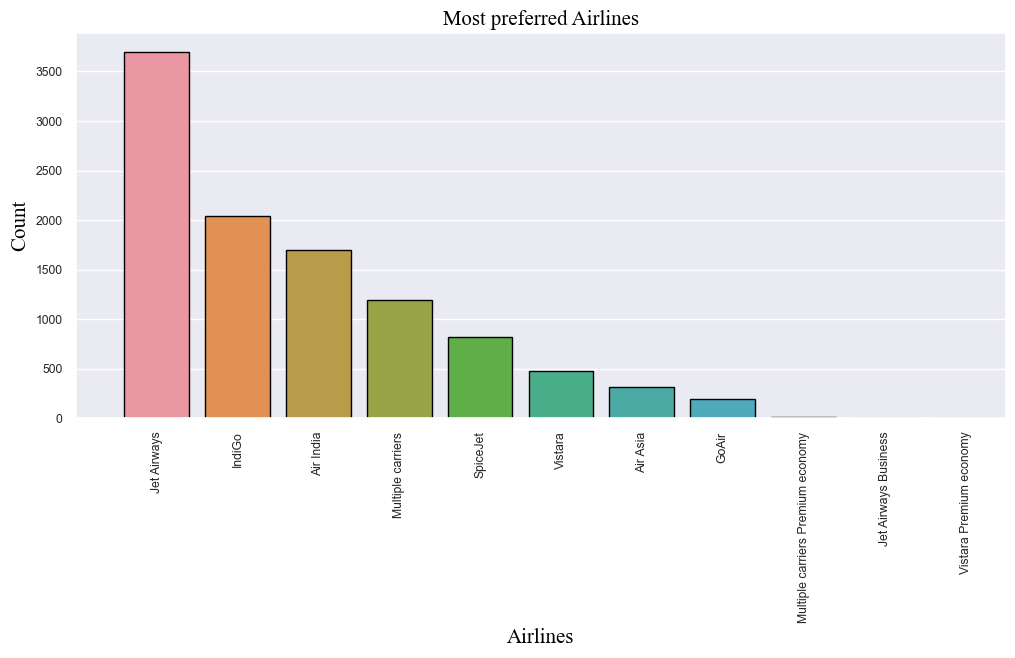

In [65]:
plt.figure(dpi=300)
plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=df1,order = df1['Airline'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':15,'color':'black'}
plt.title("Most preferred Airlines",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Airlines",fontdict=font_style)
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

In [66]:
airlines = df1.groupby('Airline').Price.max()
airlines_df= airlines.to_frame().sort_values('Price',ascending=False)[0:10]
airlines_df

Price
Airline                                 
Jet Airways Business               79512
Jet Airways                        54826
Multiple carriers                  36983
Air India                          31945
SpiceJet                           23267
GoAir                              22794
IndiGo                             22153
Vistara                            21730
Multiple carriers Premium economy  14629
Air Asia                           13774

<Figure size 4200x1800 with 0 Axes>

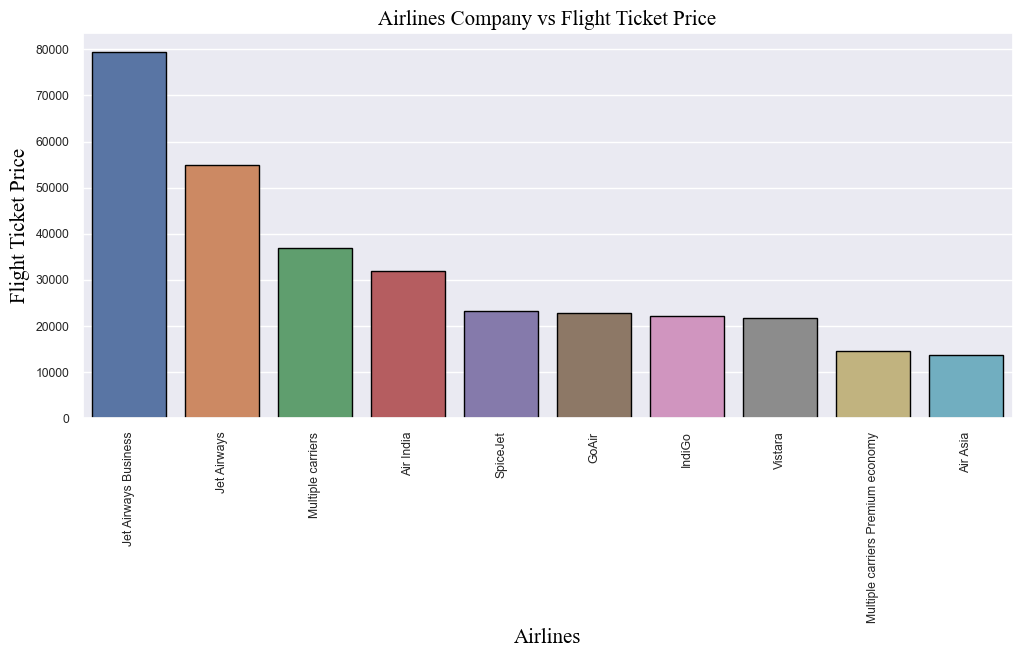

In [67]:
plt.figure(dpi=300)
plt.subplots(figsize=(12,5))
sns.barplot(x=airlines_df.index, y=airlines_df["Price"],ec = "black")
font_style={'family':'times new roman','size':15,'color':'black'}
plt.title("Airlines Company vs Flight Ticket Price",fontdict=font_style )
plt.ylabel("Flight Ticket Price", fontdict=font_style)
plt.xlabel("Airlines", fontdict=font_style)
plt.xticks(rotation=90)
plt.show()

In [68]:
#Replacing categorical values into int
df1['Total_Stops'] = df1['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

In [69]:
df1.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore       Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore       Delhi        BLR → NAG → DEL   

   Total_Stops Additional_Info  Price  Journey_Day  Journey_Month  \
0            0         No info   3897           24              3   
1            2         No info   7662            1              5   
2            2         No info  13882            9              6   
3            1         No info   6218           12              5   
4            1         No info  13302            1              3   

   Journey_Year  Departure_Hour  Departure_Minute  Arrival_Hour  \
0          2019              22                20             1   
1          2019               5                50            13   
2          2019               9                25             4   
3          2019              18                 5            23   
4          2019              16                50            21   

   Arrival_Minute  Total_Duration_Minute  
0              10                    170  
1              15                    445  
2              25                    420  
3              30                    325  
4              35                    285

In [70]:
#Creating a dummy variable that encodes categorical information.
airline_names = df1[['Airline']]
airline_names = pd.get_dummies(airline_names, drop_first=True)

In [71]:
source = df1[['Source']]
source = pd.get_dummies(source)

In [72]:
destination = df1[['Destination']]
destination = pd.get_dummies(destination)

Reference:https://www.sharpsightlabs.com/blog/pandas-get-dummies/

In [73]:
df1.drop(['Route', 'Additional_Info','Date_of_Journey'], axis=1, inplace=True)

In [74]:
df1.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [75]:
train_df = pd.concat([df1, airline_names, source, destination], axis=1)

In [76]:
train_df.shape

(10461, 31)

In [77]:
train_df

Total_Stops  Price  Journey_Day  Journey_Month  Journey_Year  \
0                0   3897           24              3          2019   
1                2   7662            1              5          2019   
2                2  13882            9              6          2019   
3                1   6218           12              5          2019   
4                1  13302            1              3          2019   
...            ...    ...          ...            ...           ...   
10678            0   4107            9              4          2019   
10679            0   4145           27              4          2019   
10680            0   7229           27              4          2019   
10681            0  12648            1              3          2019   
10682            2  11753            9              5          2019   

       Departure_Hour  Departure_Minute  Arrival_Hour  Arrival_Minute  \
0                  22                20             1              10   
1                   5                50            13              15   
2                   9                25             4              25   
3                  18                 5            23              30   
4                  16                50            21              35   
...               ...               ...           ...             ...   
10678              19                55            22              25   
10679              20                45            23              20   
10680               8                20            11              20   
10681              11                30            14              10   
10682              10                55            19              15   

       Total_Duration_Minute  Airline_Air India  Airline_GoAir  \
0                        170                  0              0   
1                        445                  1              0   
2                        420                  0              0   
3                        325                  0              0   
4                        285                  0              0   
...                      ...                ...            ...   
10678                    150                  0              0   
10679                    155                  1              0   
10680                    180                  0              0   
10681                    160                  0              0   
10682                    500                  1              0   

       Airline_IndiGo  Airline_Jet Airways  Airline_Jet Airways Business  \
0                   1                    0                             0   
1                   0                    0                             0   
2                   0                    1                             0   
3                   1                    0                             0   
4                   1                    0                             0   
...               ...                  ...                           ...   
10678               0                    0                             0   
10679               0                    0                             0   
10680               0                    1                             0   
10681               0                    0                             0   
10682               0                    0                             0   

       Airline_Multiple carriers  Airline_Multiple carriers Premium economy  \
0                              0                                          0   
1                              0                                          0   
2                              0                                          0   
3                              0                                          0   
4                              0                                          0   
...                          ...                                        ...   
10678             

### Working with the test data

In [78]:
test_df=pd.read_excel('/Users/narasimhanaiduchikkala/Downloads/archive-2/Test_set.xlsx')

In [79]:
test_df

Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL → BOM → COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU → MAA → BLR    06:20         10:20       4h      1 stop   
2     DEL → BOM → COK    19:15  19:00 22 May  23h 45m      1 stop   
3     DEL → BOM → COK    08:00         21:00      13h      1 stop   
4           BLR → DEL    23:55  02:45 25 Jun   2h 50m    non-stop   
...               ...      ...           ...      ...         ...   
2666  CCU → DEL → BLR    20:30  20:25 07 Jun  23h 55m      1 stop   
2667        CCU → BLR    14:20         16:55   2h 35m    non-stop   
2668  DEL → BOM → COK    21:50  04:25 07 Mar   6h 35m      1 stop   
2669  DEL → BOM → COK    04:00         19:15  15h 15m      1 stop   
2670  DEL → BOM → COK    04:55         19:15  14h 20m      1 stop   

                  Additional_Info  
0                         No info  
1                         No info  
2     In-flight meal not included  
3                         No info  
4                         No info  
...                           ...  
2666                      No info  
2667                      No info  
2668                      No info  
2669                      No info  
2670                      No info  

[2671 rows x 10 columns]

In [80]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


Following the same EDA steps similar to train data.

In [81]:
test_df['Date_of_Journey'] = pd.to_datetime(test_df['Date_of_Journey'],dayfirst=True)

In [82]:
test_df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [83]:
test_df['Day of Journey'] = test_df['Date_of_Journey'].dt.day
test_df['Month of Journey'] = test_df['Date_of_Journey'].dt.month
test_df['Year of Journey'] = test_df['Date_of_Journey'].dt.year

In [84]:
test_df.drop('Date_of_Journey', axis=1, inplace=True)

In [85]:
test_df['Dep_Time'] = pd.to_datetime(test_df['Dep_Time'],infer_datetime_format=True)

In [86]:
test_df['Departure_Hour'] = test_df['Dep_Time'].dt.hour
test_df['Departure_Minute'] = test_df['Dep_Time'].dt.minute

In [87]:
test_df.drop('Dep_Time', axis=1, inplace=True)

In [88]:
test_df['Arrival_Time'] = pd.to_datetime(test_df['Arrival_Time'])

In [89]:
#splitting arrival time into hour and minutes
test_df['Arrival_Hour'] = test_df['Arrival_Time'].dt.hour
test_df['Arrival_Minute'] =test_df['Arrival_Time'].dt.minute

In [90]:
test_df.drop('Arrival_Time', axis=1, inplace=True)

In [91]:
test_df['Duration_Hour']=test_df['Duration'].str.split('h').str[0].replace(['h'],'')
test_df['Duration_Minute']=test_df['Duration'].str.split('h').str[1].replace(['m'],'')
test_df['Duration_Minute']=test_df['Duration_Minute'].str[:-1]

In [92]:
test_df[test_df['Duration_Hour']=='5m']  

Airline  Source Destination Duration Total_Stops  Day of Journey  \
2660  Air India  Mumbai   Hyderabad       5m     2 stops              12   

      Month of Journey  Year of Journey  Departure_Hour  Departure_Minute  \
2660                 3             2019              16                50   

      Arrival_Hour  Arrival_Minute Duration_Hour Duration_Minute  
2660            16              55            5m             NaN

In [93]:
test_df.drop(test_df[test_df['Duration_Hour']=='5m'].index,inplace=True)

In [94]:
test_df['Duration_Hour']=test_df['Duration_Hour'].astype(int)

In [95]:
test_df['Duration_Minute'].replace('',np.nan,inplace=True)
test_df['Duration_Minute'].fillna(0,inplace=True)
test_df['Duration_Minute']=test_df['Duration_Minute'].astype(int)

In [96]:
test_df

Airline    Source Destination Duration Total_Stops  \
0           Jet Airways     Delhi      Cochin  10h 55m      1 stop   
1                IndiGo   Kolkata    Banglore       4h      1 stop   
2           Jet Airways     Delhi      Cochin  23h 45m      1 stop   
3     Multiple carriers     Delhi      Cochin      13h      1 stop   
4              Air Asia  Banglore       Delhi   2h 50m    non-stop   
...                 ...       ...         ...      ...         ...   
2666          Air India   Kolkata    Banglore  23h 55m      1 stop   
2667             IndiGo   Kolkata    Banglore   2h 35m    non-stop   
2668        Jet Airways     Delhi      Cochin   6h 35m      1 stop   
2669          Air India     Delhi      Cochin  15h 15m      1 stop   
2670  Multiple carriers     Delhi      Cochin  14h 20m      1 stop   

      Day of Journey  Month of Journey  Year of Journey  Departure_Hour  \
0                  6                 6             2019              17   
1                 12                 5             2019               6   
2                 21                 5             2019              19   
3                 21                 5             2019               8   
4                 24                 6             2019              23   
...              ...               ...              ...             ...   
2666               6                 6             2019              20   
2667              27                 3             2019              14   
2668               6                 3             2019              21   
2669               6                 3             2019               4   
2670              15                 6             2019               4   

      Departure_Minute  Arrival_Hour  Arrival_Minute  Duration_Hour  \
0                   30             4              25             10   
1                   20            10              20              4   
2                   15            19               0             23   
3                    0            21               0             13   
4                   55             2              45              2   
...                ...           ...             ...            ...   
2666                30            20              25             23   
2667                20            16              55              2   
2668                50             4              25              6   
2669                 0            19              15             15   
2670                55            19              15             14   

      Duration_Minute  
0                  55  
1                   0  
2                  45  
3                   0  
4                  50  
...               ...  
2666               55  
2667               35  
2668               35  
2669               15  
2670               20  

[2670 rows x 14 columns]

In [97]:
test_df['Destination'] = test_df['Destination'].replace('New Delhi','Delhi')

In [98]:
def to_minutes(h):
    if h>12:
        return (h-12)*60
    else:
        return h*60
    
test_df['Duration_Hour']=test_df['Duration_Hour'].apply(to_minutes)
test_df['Total_Duration_Minute']=test_df['Duration_Hour']+test_df['Duration_Minute']
test_df.drop(columns=['Duration_Hour','Duration','Duration_Minute'],inplace=True)
test_df.head()

Airline    Source Destination Total_Stops  Day of Journey  \
0        Jet Airways     Delhi      Cochin      1 stop               6   
1             IndiGo   Kolkata    Banglore      1 stop              12   
2        Jet Airways     Delhi      Cochin      1 stop              21   
3  Multiple carriers     Delhi      Cochin      1 stop              21   
4           Air Asia  Banglore       Delhi    non-stop              24   

   Month of Journey  Year of Journey  Departure_Hour  Departure_Minute  \
0                 6             2019              17                30   
1                 5             2019               6                20   
2                 5             2019              19                15   
3                 5             2019               8                 0   
4                 6             2019              23                55   

   Arrival_Hour  Arrival_Minute  Total_Duration_Minute  
0             4              25                    655  
1            10              20                    240  
2            19               0                    705  
3            21               0                     60  
4             2              45                    170

In [99]:
airline_names = test_df[['Airline']]
airline_names = pd.get_dummies(airline_names, drop_first=True)

source_test = test_df[['Source']]
source_test = pd.get_dummies(source_test, drop_first=True)

dest_test = test_df[['Destination']]
dest_test = pd.get_dummies(dest_test, drop_first=True)

In [100]:
test_df.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [101]:
test_df['Total_Stops'] = test_df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2,'3 stops': 3, '4 stops': 4})

In [102]:
test_df = pd.concat([test_df, airline_names, source_test, dest_test], axis=1)

In [103]:
test_df.shape

(2670, 27)

## Building the Prediction Models

In [104]:
X = train_df.drop('Price', axis=1)
Y = train_df['Price']

In [105]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


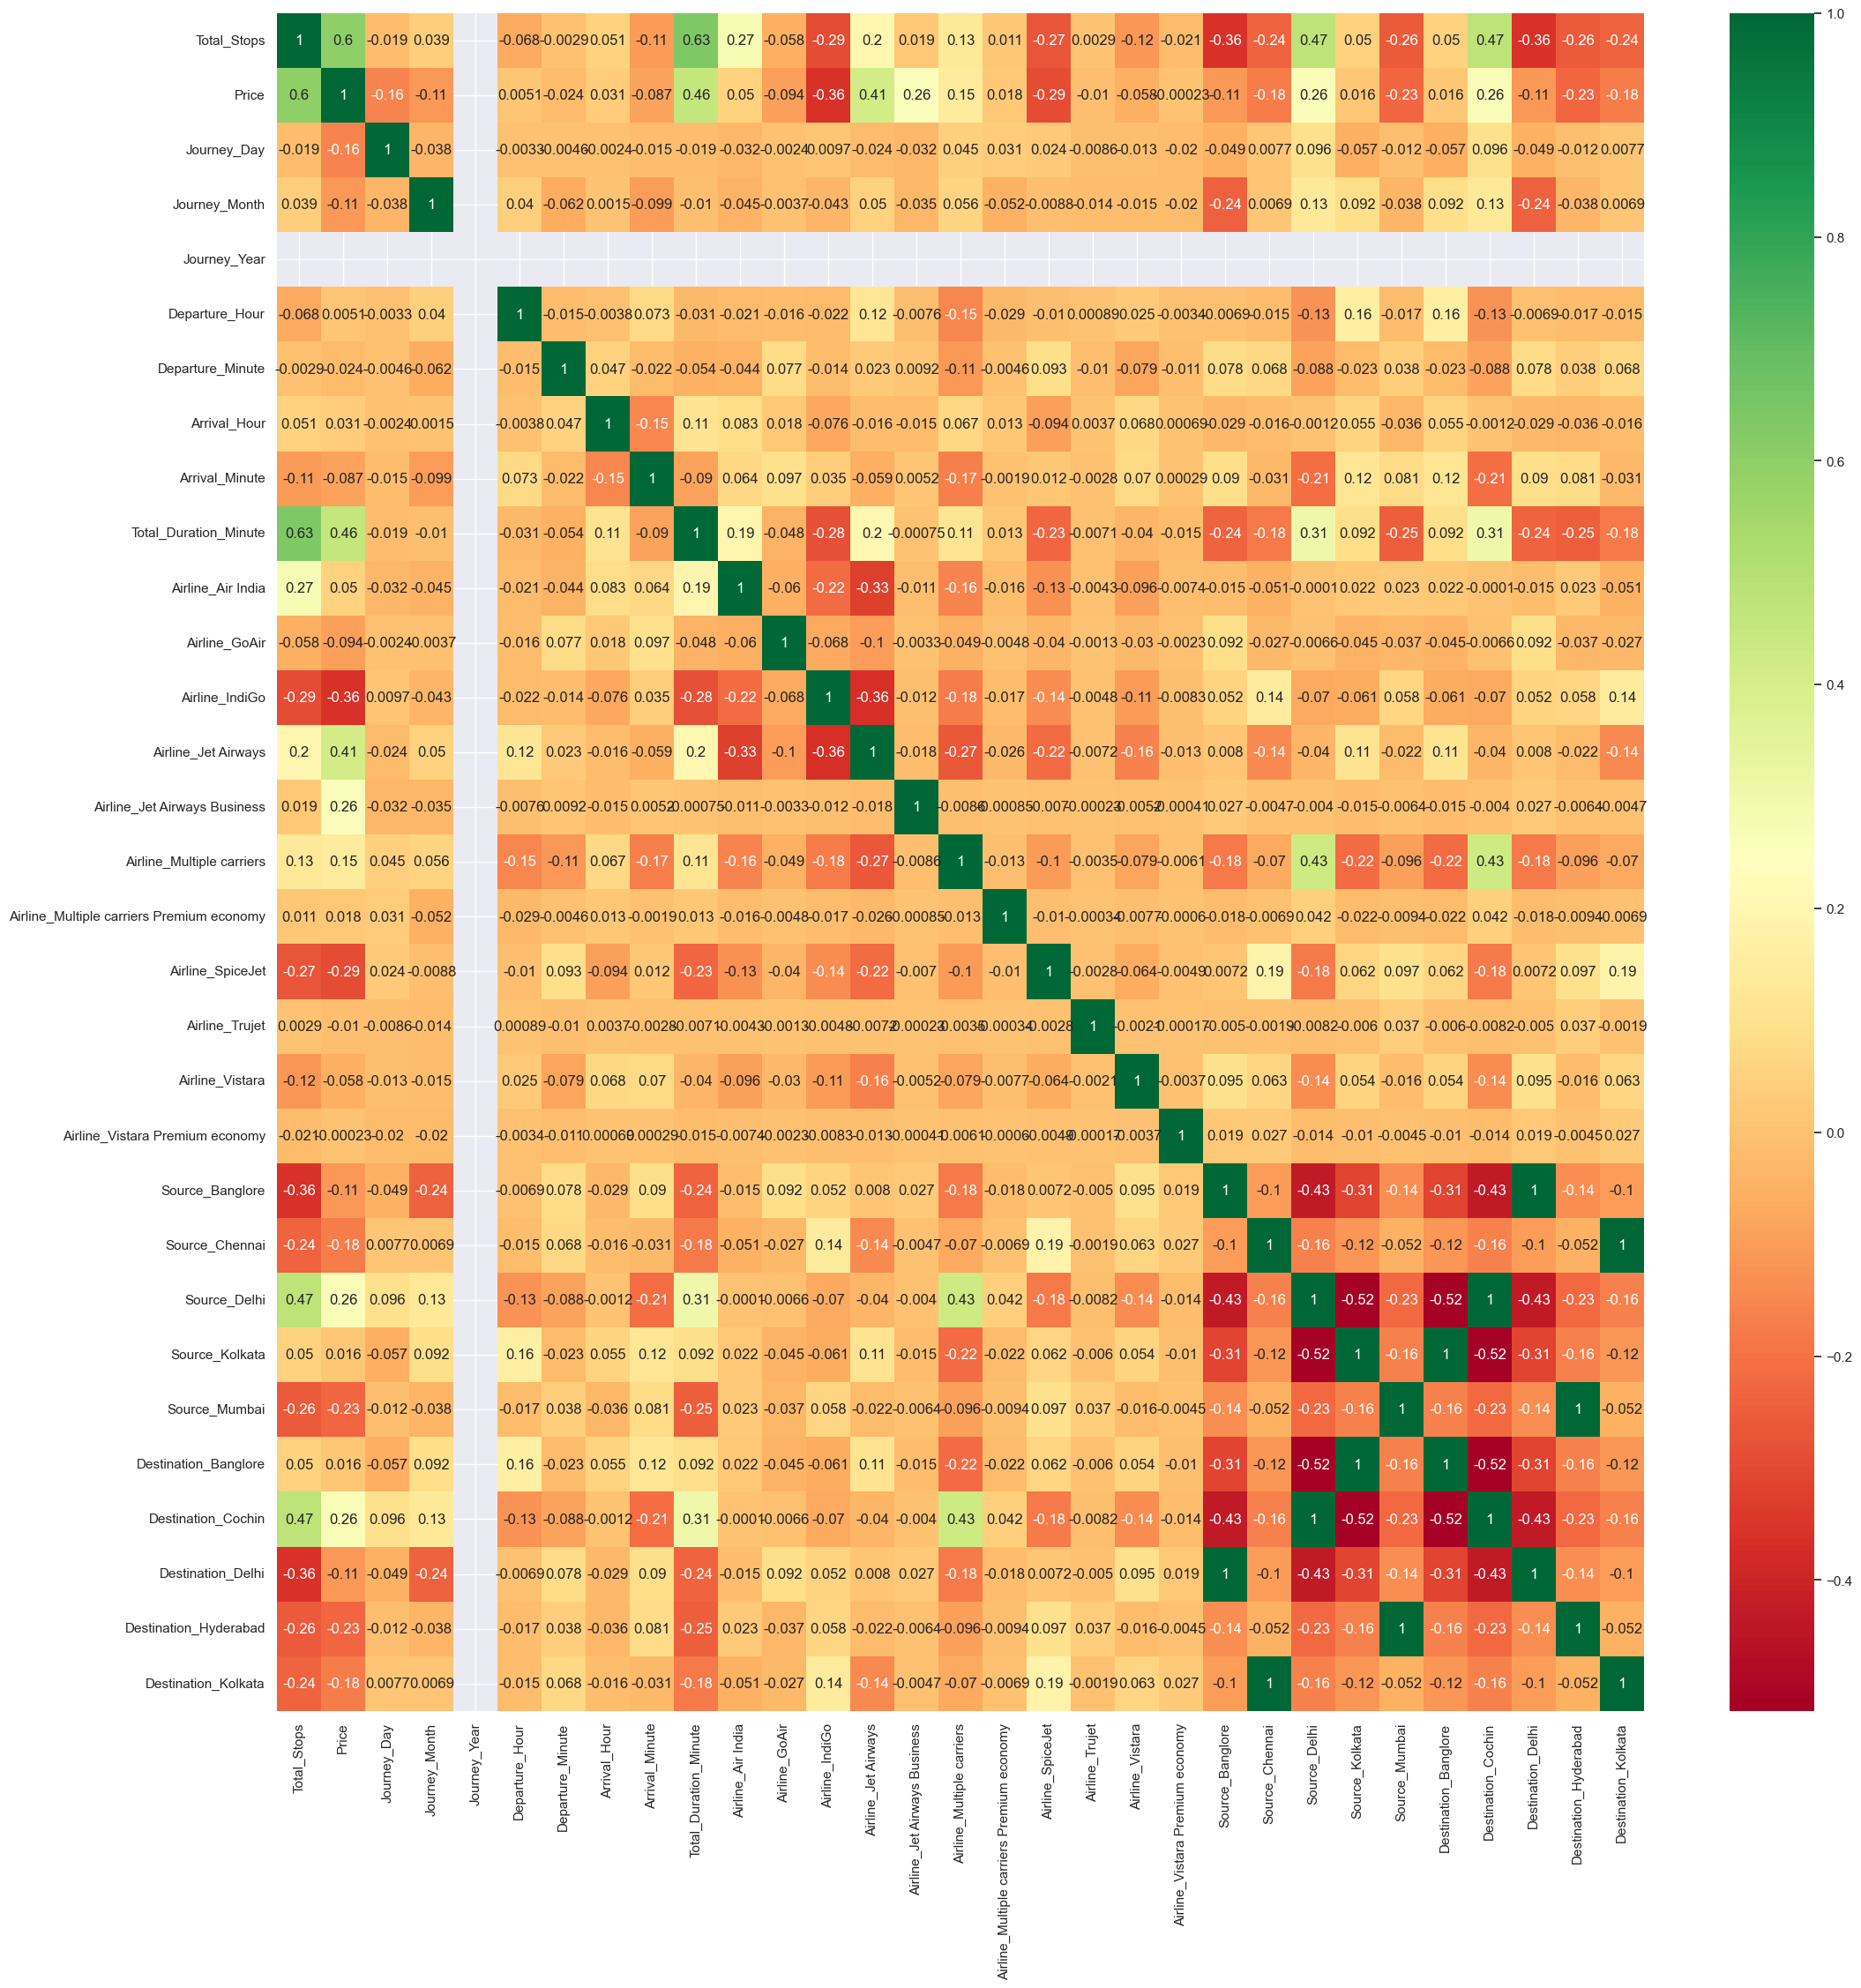

In [106]:
#To get correlation we plot the heat map
sns.set(rc={'figure.figsize':(25, 25)})
sns.heatmap(train_df.corr(),
           annot=True, cmap='RdYlGn')
plt.show()

In [107]:
# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [108]:
#Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                  Y, 
                                                  test_size=0.25, 
                                                  random_state=24,
                                                   shuffle =True)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7845, 30)
(2616, 30)
(7845,)
(2616,)


In [109]:
CV = []
train_scores = []
test_scores = []
test_maes = []
train_maes = []

def pred_model(model):
    # Training model
    model.fit(X_train, Y_train)
            
    # Score of train set
    train_model_score = model.score(X_train, Y_train)
    train_scores.append(round(train_model_score, 2))
    y_pred_train = model.predict(X_train)
    
    # Score of test set
    test_model_score = model.score(X_test, Y_test)
    test_scores.append(round(test_model_score, 2))
    y_pred_test = model.predict(X_test)
    
    # Train set using Cross validation
    cross_val = cross_val_score(model, X_train, Y_train, cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean, 2))
    
    # Mean absolute error for train set
    train_mae = mean_absolute_error(Y_train, y_pred_train)
    train_maes.append(train_mae)
    
    # Mean absolute error for test set
    test_mae = mean_absolute_error(Y_test, y_pred_test)
    test_maes.append(test_mae)
    
    # Printing results
    print("Train score:", round(train_model_score, 2))
    print("Test score:", round(test_model_score, 2))
    print("Train CV scores:", cross_val)
    print("Train CV mean:", round(cv_mean, 2))
    print("Mean absolute error for train:", mean_absolute_error(Y_train, y_pred_train))
    print("Median absolute error for train:", median_absolute_error(Y_train, y_pred_train))
    print("Mean absolute error for test:", mean_absolute_error(Y_test, y_pred_test))
    print("Median absolute error for test:", mean_absolute_error(Y_test, y_pred_test))
    
    
    # Create a DataFrame to display actual and predicted values
    df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_test})
    print("\nActual vs Predicted:")
    print(df.head())
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((Y_train[:100] - y_pred_train[:100]), hist=False, ax=ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x=Y_test[:100], y=y_pred_test[:100])
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    # Plotting actual vs predicted values
    plt.figure(figsize=(15, 10))
    plt.title('Actual vs Predicted Prices')
    plt.xlabel('Observations')
    plt.ylabel('Price')
    plt.plot(range(100), Y_test[:100], label='Actual Price')
    plt.plot(range(100), y_pred_test[:100], label='Predicted Price')
    plt.legend()
    plt.show()


Train score: 0.62
Test score: 0.57
Train CV scores: [0.6196779  0.64798078 0.62798278 0.64111438 0.5581247 ]
Train CV mean: 0.62
Mean absolute error for train: 1939.7336926443925
Median absolute error for train: 1385.188202088797
Mean absolute error for test: 2055.2969768564394
Median absolute error for test: 2055.2969768564394

Actual vs Predicted:
      Actual     Predicted
3067   10394  10619.188402
4962    6734   7304.258818
4145    8614  10071.633942
8131    4160   7366.139600
2166    8040   6184.561577


/var/folders/fv/3d_bz2qx3svdgrc_1ytkb4nw0000gn/T/ipykernel_1422/21402196.py:54: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




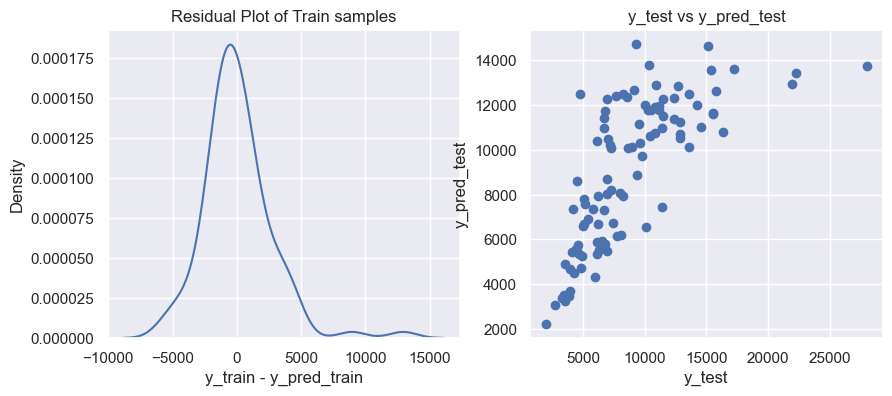

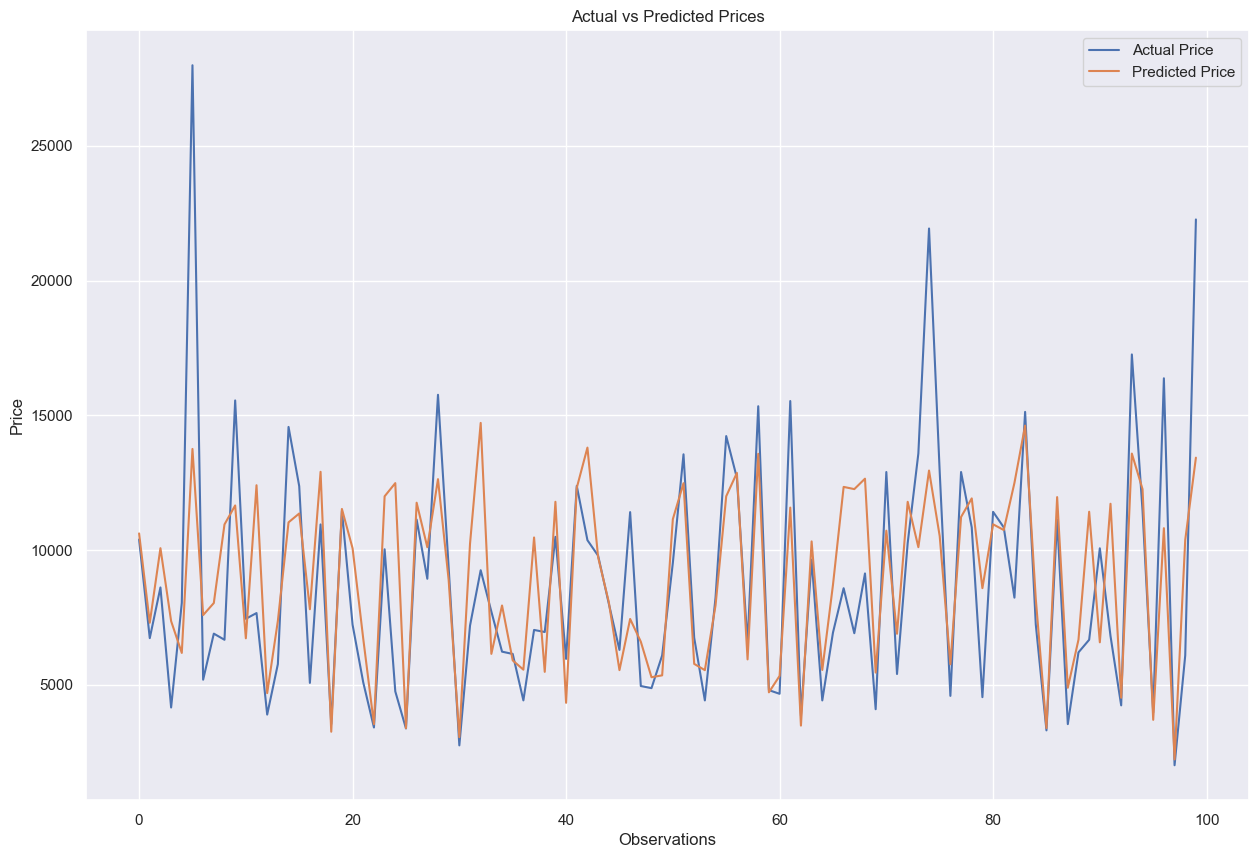

In [110]:
lr = LinearRegression()
pred_model(lr)

/Users/narasimhanaiduchikkala/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/narasimhanaiduchikkala/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/narasimhanaiduchikkala/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1583, in fit
    self._validate_params()
  File "/Users/narasimhanaiduchikkala/anaconda3/lib/python3.10/site-packages/sklearn/ba

/Users/narasimhanaiduchikkala/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/narasimhanaiduchikkala/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/narasimhanaiduchikkala/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1583, in fit
    self._validate_params()
  File "/Users/narasimhanaiduchikkala/anaconda3/lib/python3.10/site-packages/sklearn/ba

Train score: 0.24
Test score: 0.23
Train CV scores: [ 0.24056405  0.18007295 -0.17806131  0.1512437  -0.19586442]
Train CV mean: 0.04
Mean absolute error for train: 2942.057727482059
Median absolute error for train: 2569.3112576615804
Mean absolute error for test: 3044.9671662366304
Median absolute error for test: 3044.9671662366304

Actual vs Predicted:
      Actual     Predicted
3067   10394  11341.085769
4962    6734   7537.927216
4145    8614   9781.673260
8131    4160   6115.340666
2166    8040   6202.740294


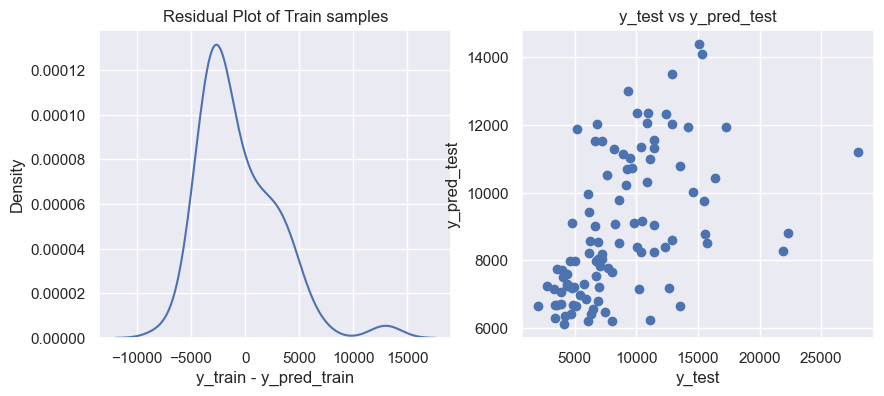

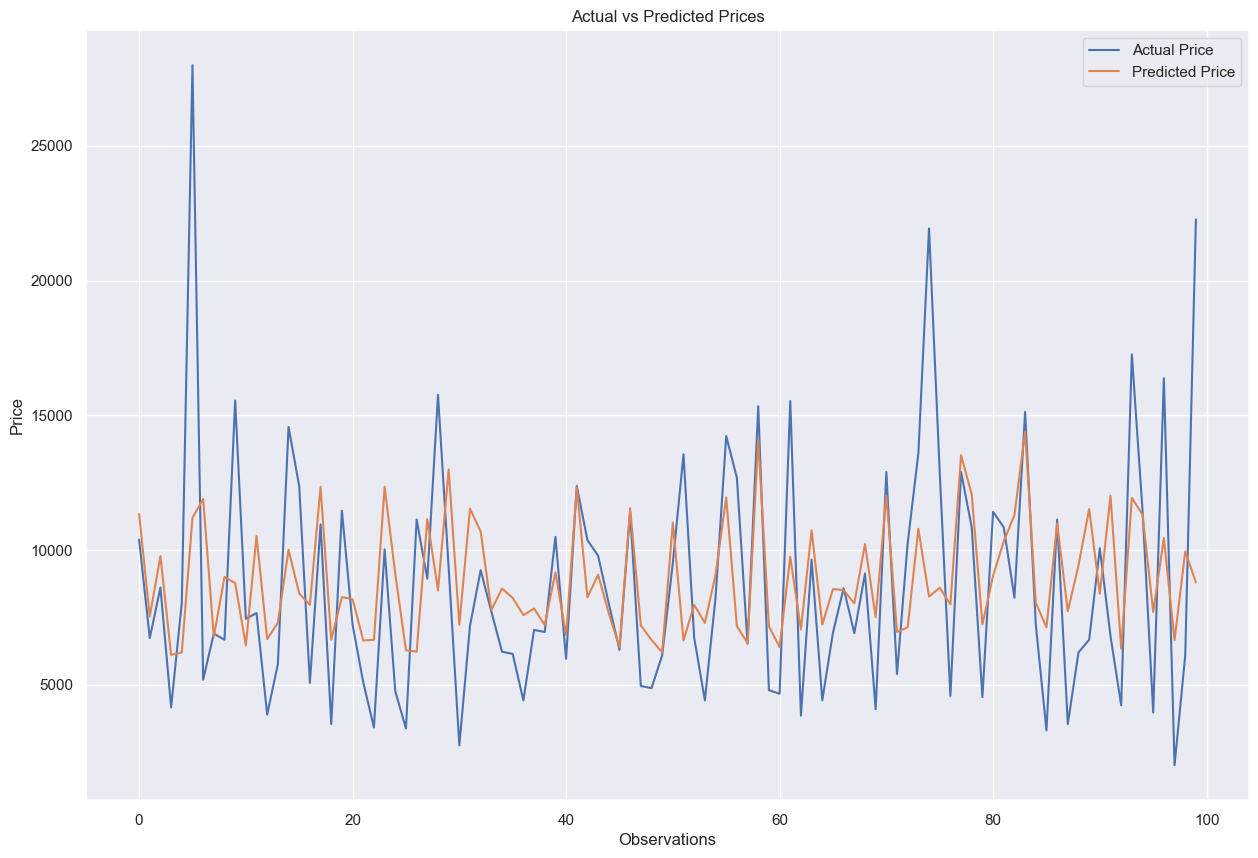

In [111]:
# Creating Ridge model object
SGDR = SGDRegressor()
 
dic={"penalty":['l2','l1', 'elasticnet'],
     "loss":['squared_loss','huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
    }

# Creating GridSearchCV to find the best estimator of hyperparameter
SGDR_rs = GridSearchCV(estimator = SGDR, param_grid=dic)
pred_model(SGDR_rs)

In [112]:
SGDR_rs.best_estimator_

SGDRegressor(loss='epsilon_insensitive', penalty='elasticnet')

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html   

Train score: 0.89
Test score: 0.81
Train CV scores: [0.83185685 0.85234833 0.82258112 0.83841534 0.76625666]
Train CV mean: 0.82
Mean absolute error for train: 964.878335138199
Median absolute error for train: 618.1539296250539
Mean absolute error for test: 1245.827194392069
Median absolute error for test: 1245.827194392069

Actual vs Predicted:
      Actual     Predicted
3067   10394  12396.514894
4962    6734   6944.982249
4145    8614   8420.919928
8131    4160   5017.331444
2166    8040   6363.487350


/var/folders/fv/3d_bz2qx3svdgrc_1ytkb4nw0000gn/T/ipykernel_1422/21402196.py:54: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




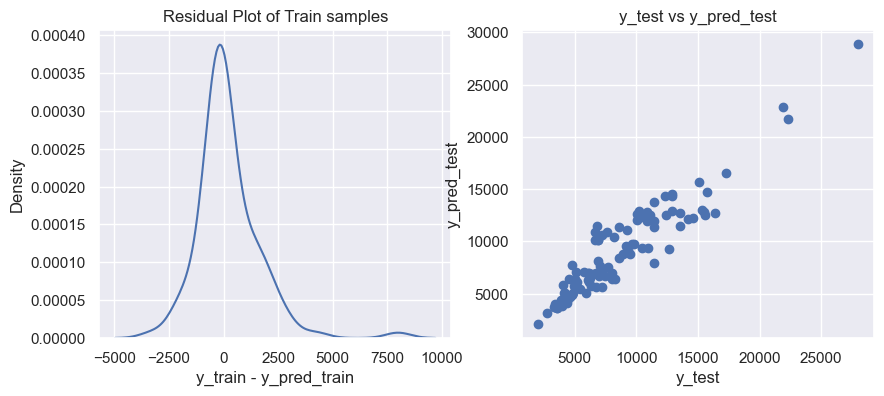

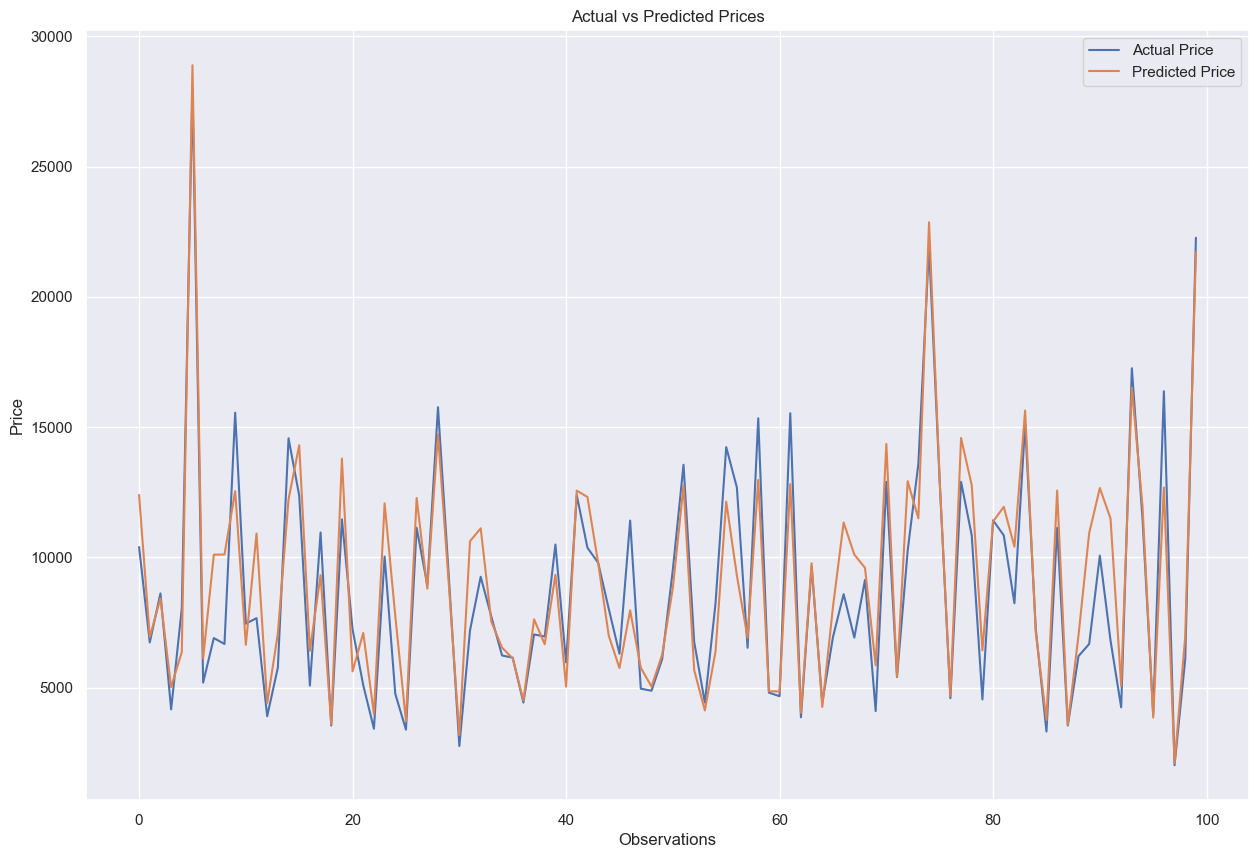

In [113]:
RF = RandomForestRegressor(max_depth=50,min_samples_split=20,n_estimators=100)
pred_model(RF)

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

/Users/narasimhanaiduchikkala/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/Users/narasimhanaiduchikkala/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Train score: 0.27
Test score: 0.25
Train CV scores: [ 3.32948206e-01 -4.31760104e-05  2.42317820e-01  3.68420419e-01
  2.88900700e-01]
Train CV mean: 0.25
Mean absolute error for train: 2817.907484196991
Median absolute error for train: 2349.425599158243
Mean absolute error for test: 2960.1852325225714
Median absolute error for test: 2960.1852325225714

Actual vs Predicted:
      Actual     Predicted
3067   10394  11142.574595
4962    6734   6348.722371
4145    8614  11142.574571
8131    4160   6348.722355
2166    8040   6348.722355


/var/folders/fv/3d_bz2qx3svdgrc_1ytkb4nw0000gn/T/ipykernel_1422/21402196.py:54: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




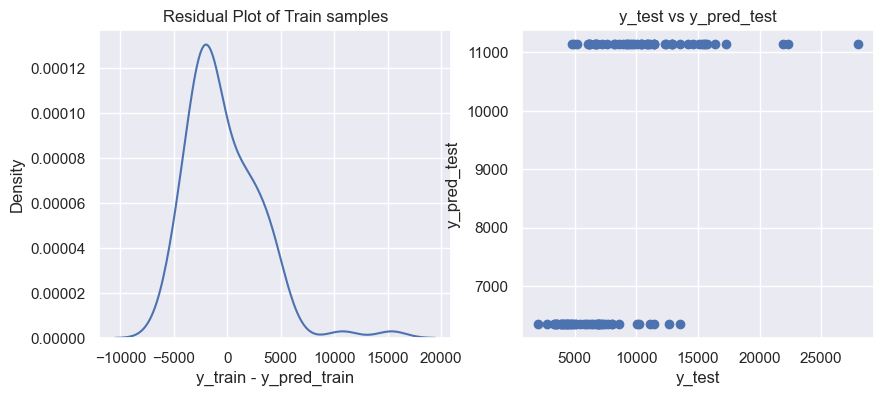

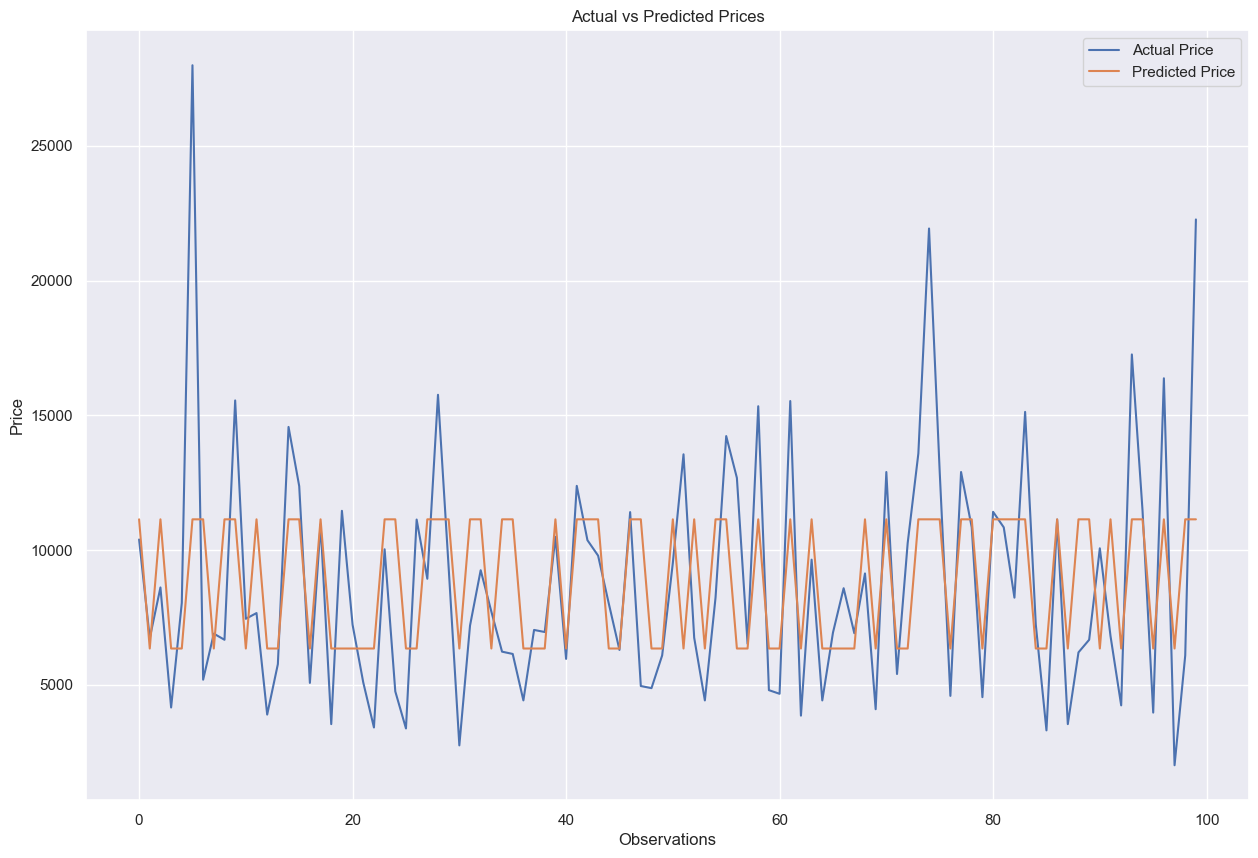

In [114]:
MLPR=MLPRegressor(activation='logistic',solver='lbfgs')
pred_model(MLPR)

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

Train score: 0.94
Test score: 0.81
Train CV scores: [0.85066312 0.85929079 0.82464358 0.83661933 0.75906853]
Train CV mean: 0.83
Mean absolute error for train: 810.8867941550649
Median absolute error for train: 521.103515625
Mean absolute error for test: 1254.5441019600685
Median absolute error for test: 1254.5441019600685

Actual vs Predicted:
      Actual     Predicted
3067   10394  10101.409180
4962    6734   6085.682129
4145    8614   8298.080078
8131    4160   5339.750977
2166    8040   6622.047852


/var/folders/fv/3d_bz2qx3svdgrc_1ytkb4nw0000gn/T/ipykernel_1422/21402196.py:54: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




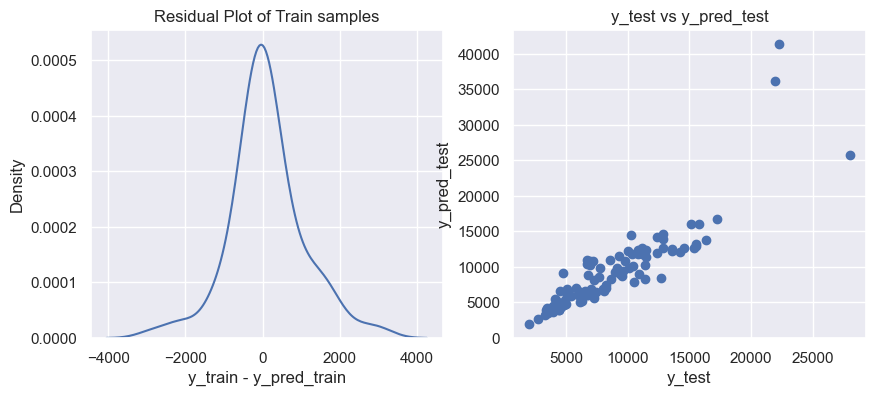

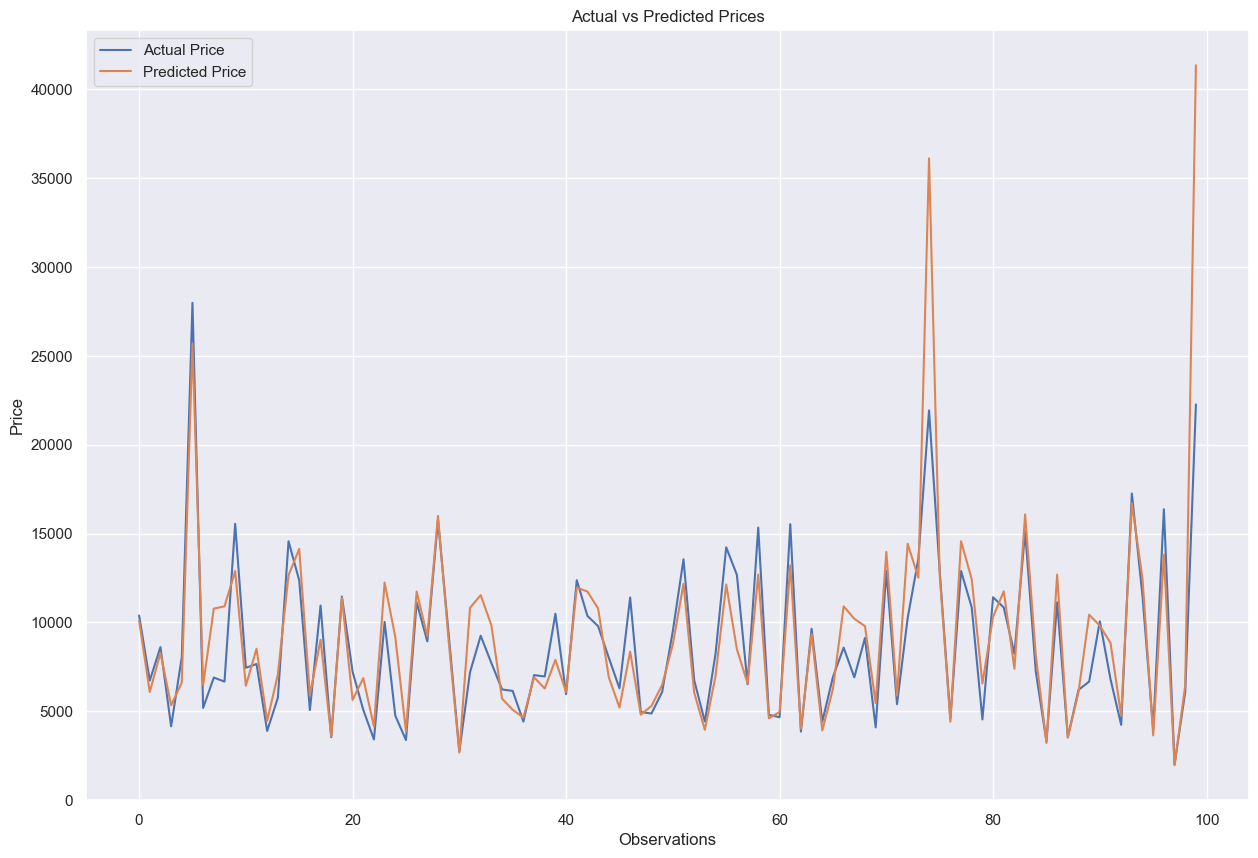

In [115]:
# Create and train the XGBRegressor model to get predictions.
XGBR = XGBRegressor()
pred_model(XGBR)

## comparison of results obtained from different models

In [116]:
#Getting the accuracy and erros for each model
Technique = ["LinearRegression","SGDRegressor","RandomForestRegressor","MLPRegressor","XGBRegressor"]
results=pd.DataFrame({'Model': Technique,'Accuracy(Train)': train_scores,'Accuracy(Test)': test_scores,'MAE(Train)': train_maes,'MAE(Test)': test_maes})
display(results)

Model  Accuracy(Train)  Accuracy(Test)   MAE(Train)  \
0       LinearRegression             0.62            0.57  1939.733693   
1           SGDRegressor             0.24            0.23  2942.057727   
2  RandomForestRegressor             0.89            0.81   964.878335   
3           MLPRegressor             0.27            0.25  2817.907484   
4           XGBRegressor             0.94            0.81   810.886794   

     MAE(Test)  
0  2055.296977  
1  3044.967166  
2  1245.827194  
3  2960.185233  
4  1254.544102

###  Hyperparameter tuning

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

CV = []
train_scores = []
test_scores = []
test_maes = []

def pred_model(model, param_grid):
    # Hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, Y_train)
    
    # Best model
    best_model = grid_search.best_estimator_
    
    # Training model
    best_model.fit(X_train, Y_train)
            
    # Score of train set
    train_model_score = best_model.score(X_train, Y_train)
    train_scores.append(round(train_model_score, 2))
    y_pred_train = best_model.predict(X_train)
    
    # Score of test set
    test_model_score = best_model.score(X_test, Y_test)
    test_scores.append(round(test_model_score, 2))
    y_pred_test = best_model.predict(X_test)
    
    # Train set using Cross validation
    cross_val = cross_val_score(best_model, X_train, Y_train, cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean, 2))
    
    # Mean absolute error for test set
    test_mae = mean_absolute_error(Y_test, y_pred_test)
    test_maes.append(test_mae)
    
    # Printing results
    print("Best parameters:", grid_search.best_params_)
    print("Train score:", round(train_model_score, 2))
    print("Test score:", round(test_model_score, 2))
    print("Train CV scores:", cross_val)
    print("Train CV mean:", round(cv_mean, 2))
    print("Mean absolute error for train:", mean_absolute_error(Y_train, y_pred_train))
    print("Median absolute error for train:", median_absolute_error(Y_train, y_pred_train))
    print("Mean absolute error for test:", test_mae)
    print("Median absolute error for test:", mean_absolute_error(Y_test, y_pred_test))
    
    #Feature importance
    importances = best_model.feature_importances_
    features = X_train.columns
    indices = np.argsort(importances)

    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

    
    # Create a DataFrame to display actual and predicted values
    df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_test})
    print("\nActual vs Predicted:")
    print(df.head())
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((Y_train[:100] - y_pred_train[:100]), hist=False, ax=ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x=Y_test[:100], y=y_pred_test[:100])
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    # Plotting actual vs predicted values
    plt.figure(figsize=(15, 10))
    plt.title('Actual vs Predicted Prices')
    plt.xlabel('Observations')
    plt.ylabel('Price')
    plt.plot(range(100), Y_test[:100], label='Actual Price')
    plt.plot(range(100), y_pred_test[:100], label='Predicted Price')
    plt.legend()
    plt.show()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200]
}

# Define the parameter grid for XGBRegressor
param_grid_xgbr = {
    'max_depth': [3, 5, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Train score: 0.91
Test score: 0.82
Train CV scores: [0.83843221 0.86266855 0.82279165 0.84549253 0.76949479]
Train CV mean: 0.83
Mean absolute error for train: 810.6061639910722
Median absolute error for train: 453.6931052868258
Mean absolute error for test: 1208.8329102658533
Median absolute error for test: 1208.8329102658533


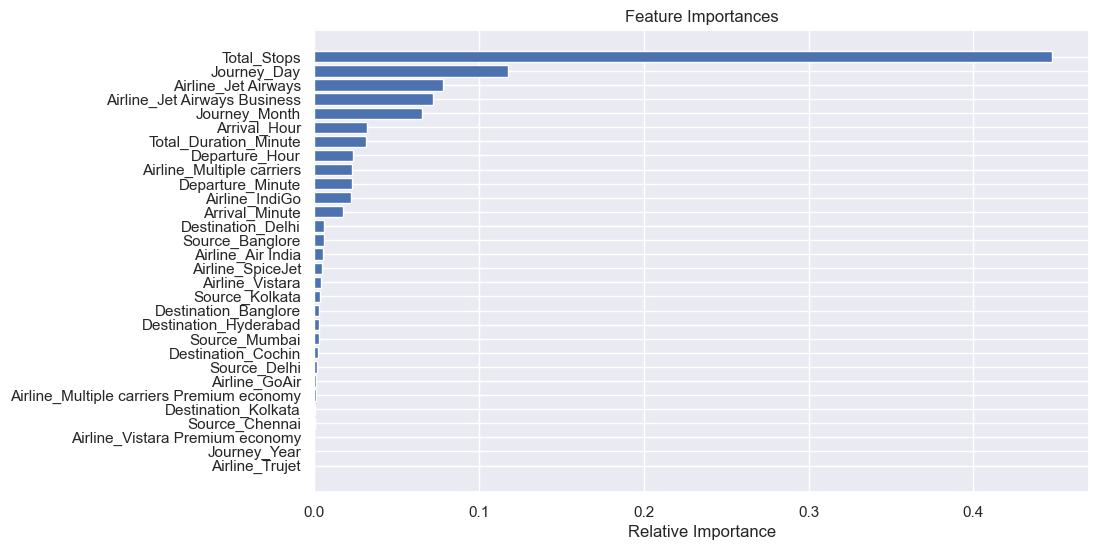


Actual vs Predicted:
      Actual     Predicted
3067   10394  12360.647317
4962    6734   6830.469465
4145    8614   7704.372267
8131    4160   5253.900615
2166    8040   6518.171710


/var/folders/fv/3d_bz2qx3svdgrc_1ytkb4nw0000gn/T/ipykernel_1422/785661474.py:72: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




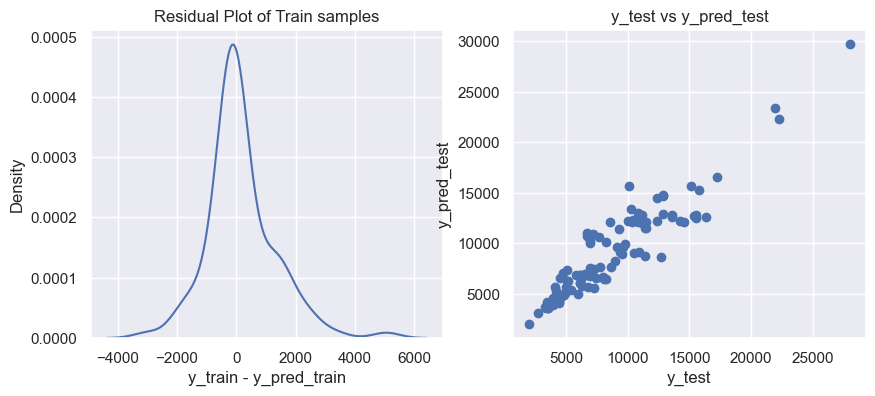

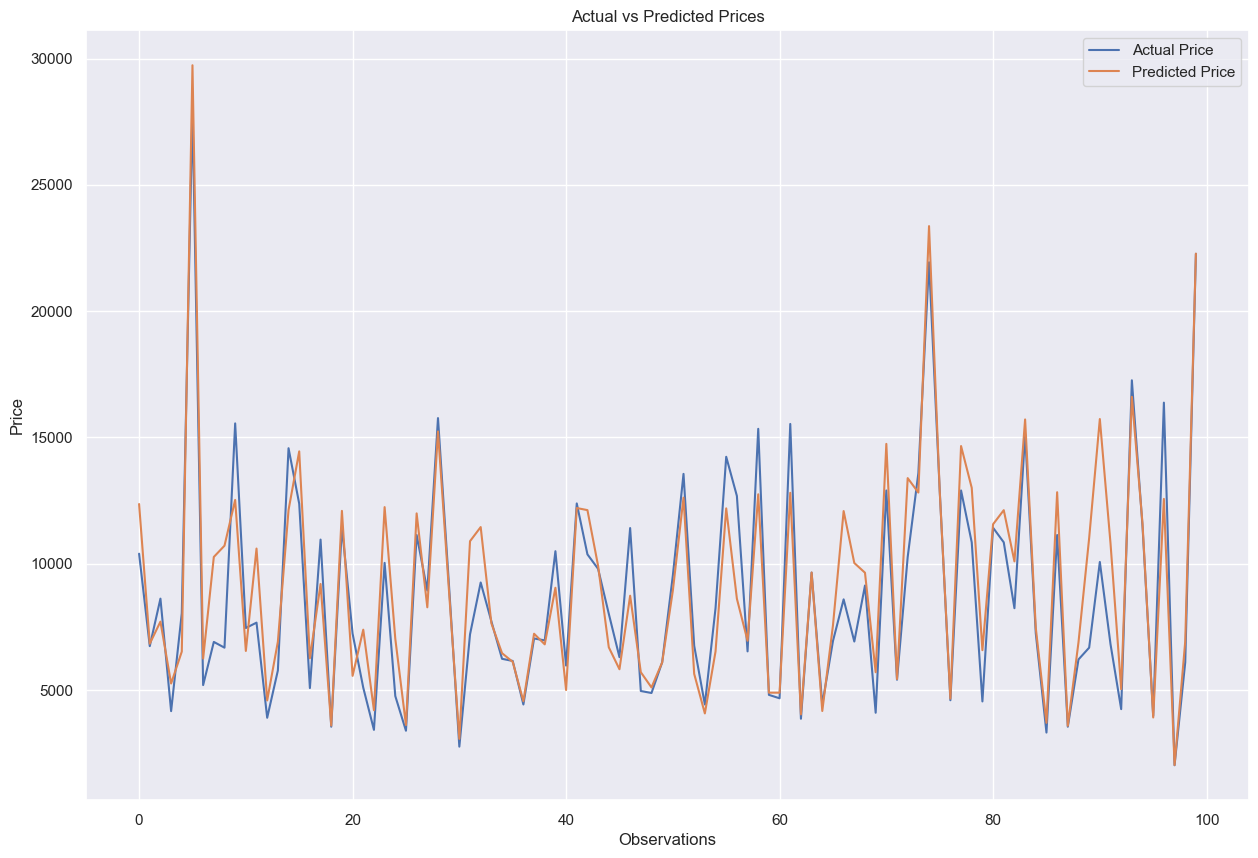

In [118]:
# Create and train the Random Forest Regressor model with hyperparameter tuning
rf = RandomForestRegressor()
pred_model(rf, param_grid)

Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}
Train score: 0.93
Test score: 0.82
Train CV scores: [0.84492474 0.86332569 0.82238396 0.83537319 0.76542421]
Train CV mean: 0.83
Mean absolute error for train: 828.5261803397865
Median absolute error for train: 518.56689453125
Mean absolute error for test: 1228.2260475741978
Median absolute error for test: 1228.2260475741978


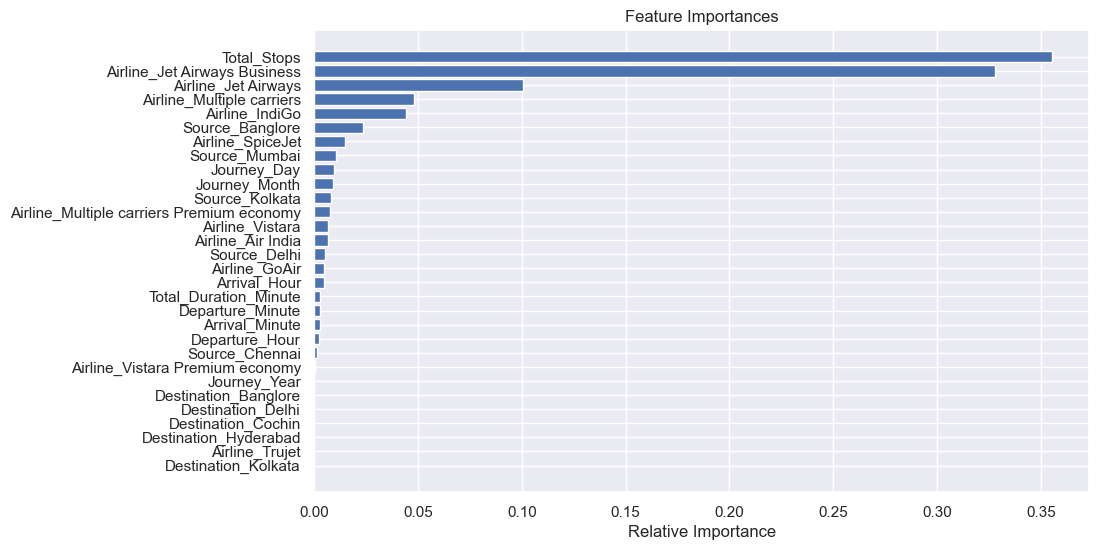


Actual vs Predicted:
      Actual     Predicted
3067   10394  11723.521484
4962    6734   6415.872559
4145    8614   8886.860352
8131    4160   4829.589844
2166    8040   5974.526855


/var/folders/fv/3d_bz2qx3svdgrc_1ytkb4nw0000gn/T/ipykernel_1422/785661474.py:72: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




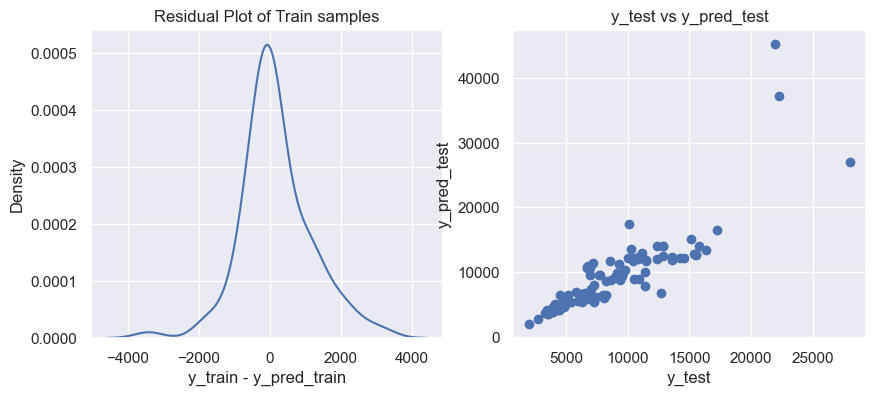

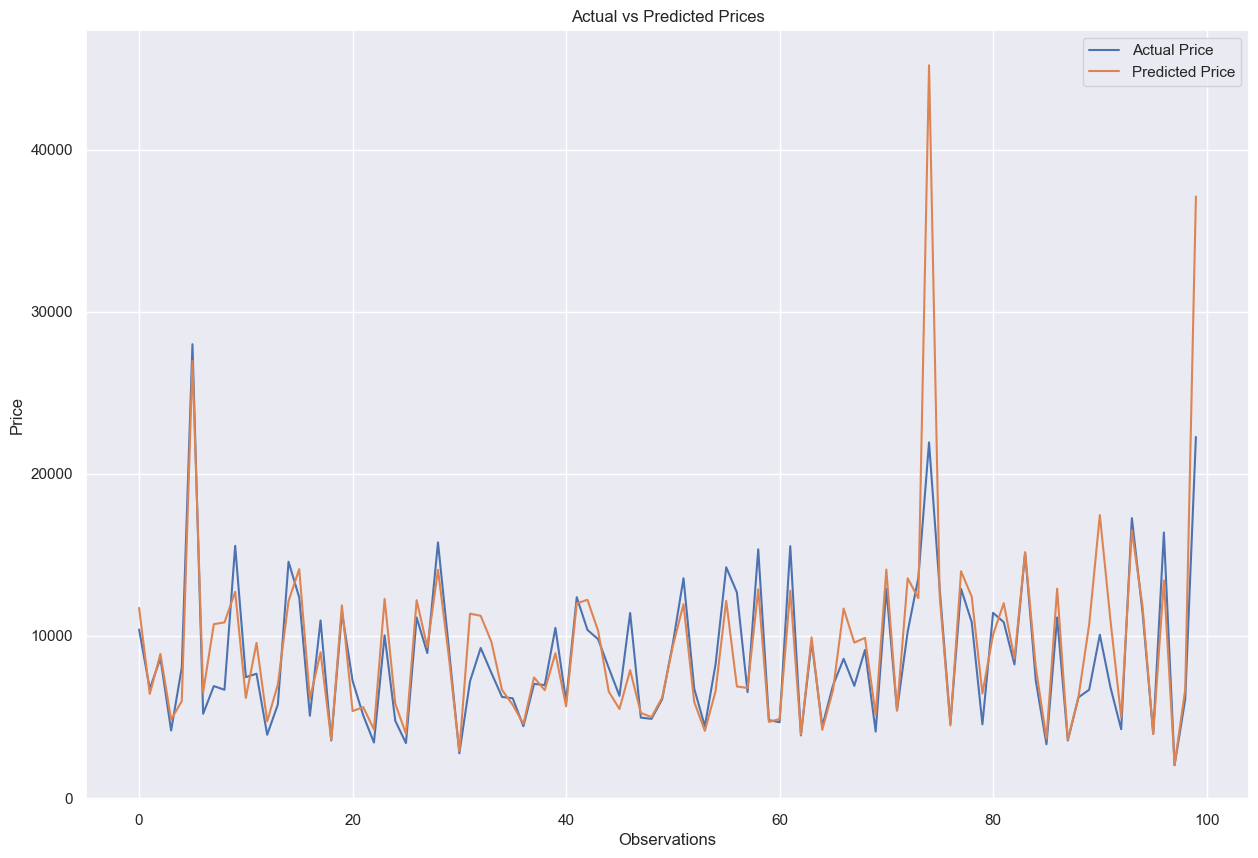

In [119]:
XGBR = XGBRegressor()
pred_model(XGBR, param_grid_xgbr)

In [120]:
# Display the results using pandas DataFrame
Technique = ["RandomForestRegressor", "XGBR"]
results = pd.DataFrame({'Model': Technique, 'Accuracy(Train)': train_scores, 'Accuracy(Test)': test_scores})
display(results)

Model  Accuracy(Train)  Accuracy(Test)
0  RandomForestRegressor             0.91            0.82
1                   XGBR             0.93            0.82

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

# Define the parameter grid for hyperparameter tuning
param_grid_gb = {
    'max_depth': [3, 5, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001]
}

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Train score: 0.9
Test score: 0.8
Train CV scores: [0.84058814 0.85810317 0.83641343 0.84617991 0.76108346]
Train CV mean: 0.83
Mean absolute error for train: 1031.8347735323641
Median absolute error for train: 731.311370154921
Mean absolute error for test: 1311.2335072508397
Median absolute error for test: 1311.2335072508397


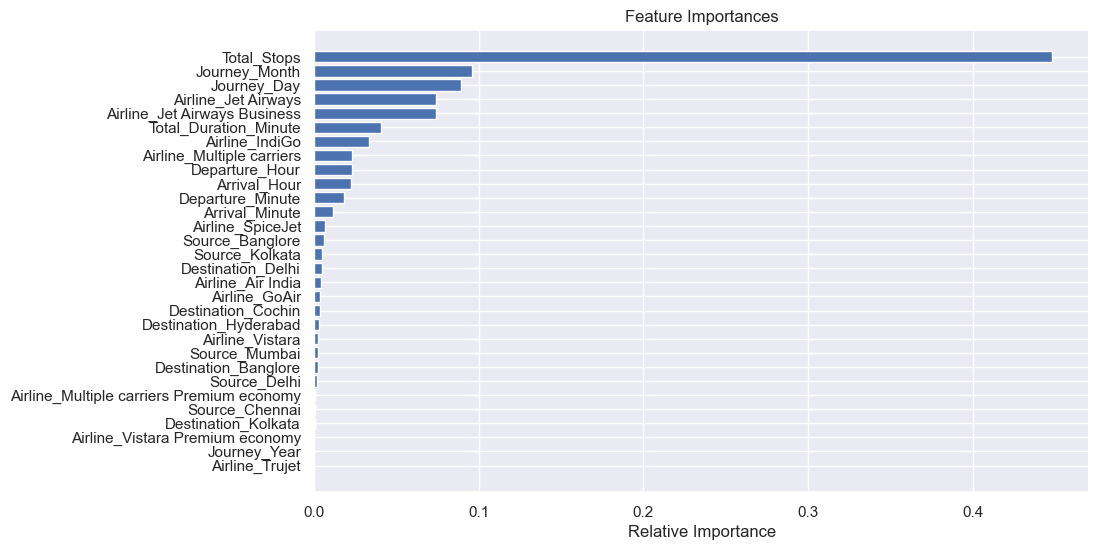


Actual vs Predicted:
      Actual     Predicted
3067   10394  11334.879476
4962    6734   6074.539747
4145    8614   9390.753153
8131    4160   5147.948155
2166    8040   6047.007655


/var/folders/fv/3d_bz2qx3svdgrc_1ytkb4nw0000gn/T/ipykernel_1422/239053162.py:72: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




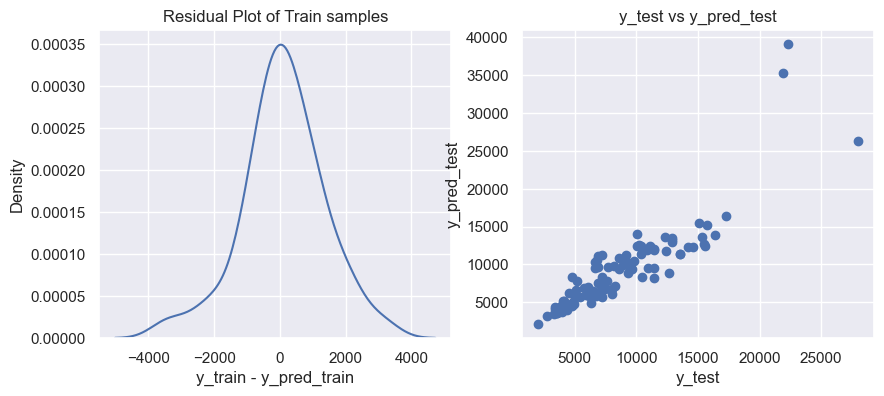

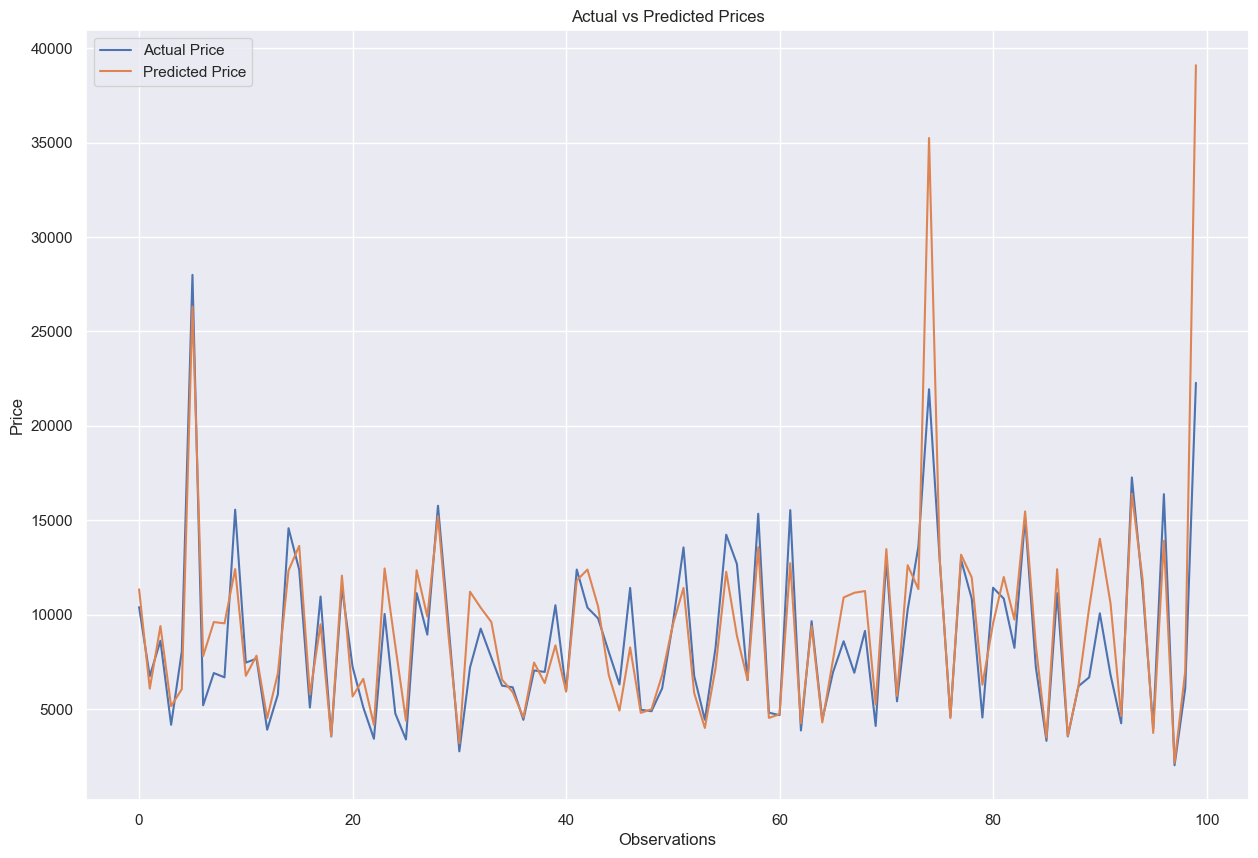

In [122]:
# Perform hyperparameter tuning and feature selection for GradientBoostingRegressor
gb = GradientBoostingRegressor()
pred_model(gb, param_grid_gb)

Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Train score: 0.57
Test score: 0.52
Train CV scores: [0.53311739 0.5816052  0.59089941 0.53720236 0.51970415]
Train CV mean: 0.55
Mean absolute error for train: 2244.315578057785
Median absolute error for train: 1765.9220549158545
Mean absolute error for test: 2392.752203353866
Median absolute error for test: 2392.752203353866


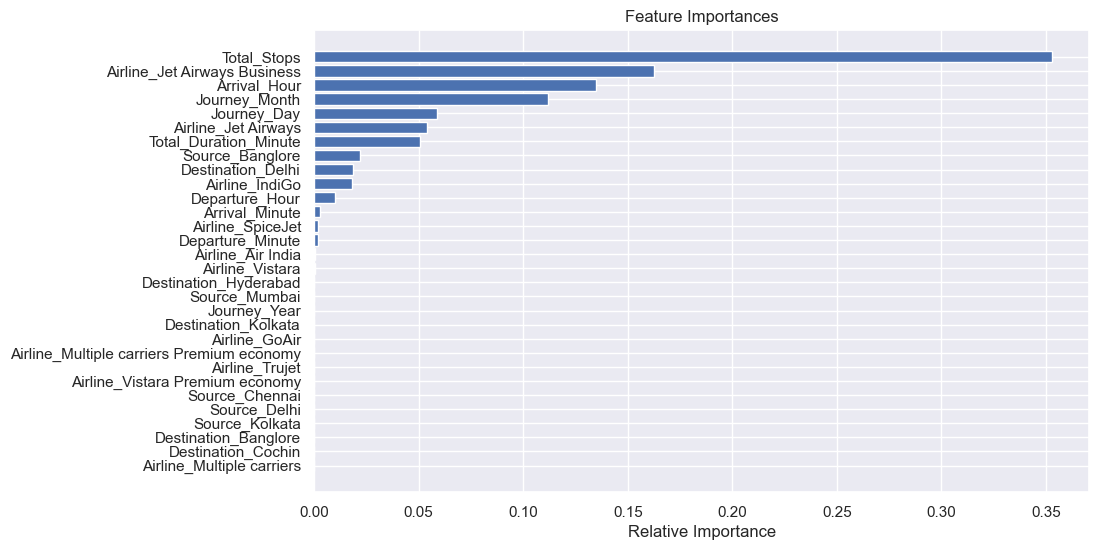


Actual vs Predicted:
      Actual     Predicted
3067   10394  11902.255380
4962    6734   9734.990286
4145    8614  10776.211841
8131    4160   6531.422562
2166    8040   6034.055351


/var/folders/fv/3d_bz2qx3svdgrc_1ytkb4nw0000gn/T/ipykernel_1422/239053162.py:72: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




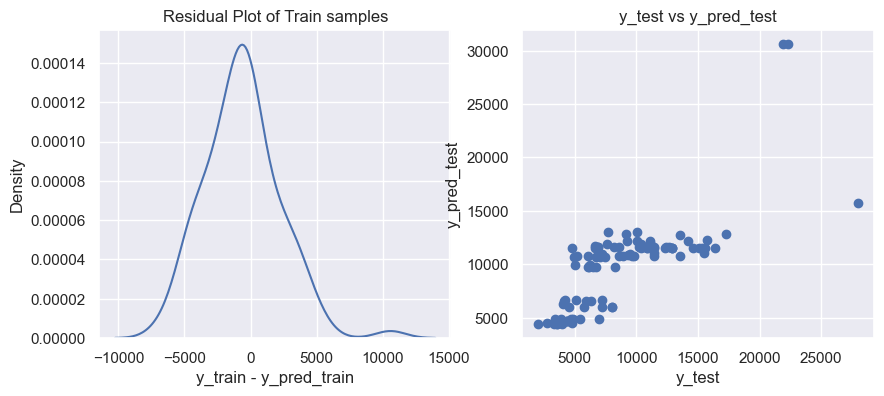

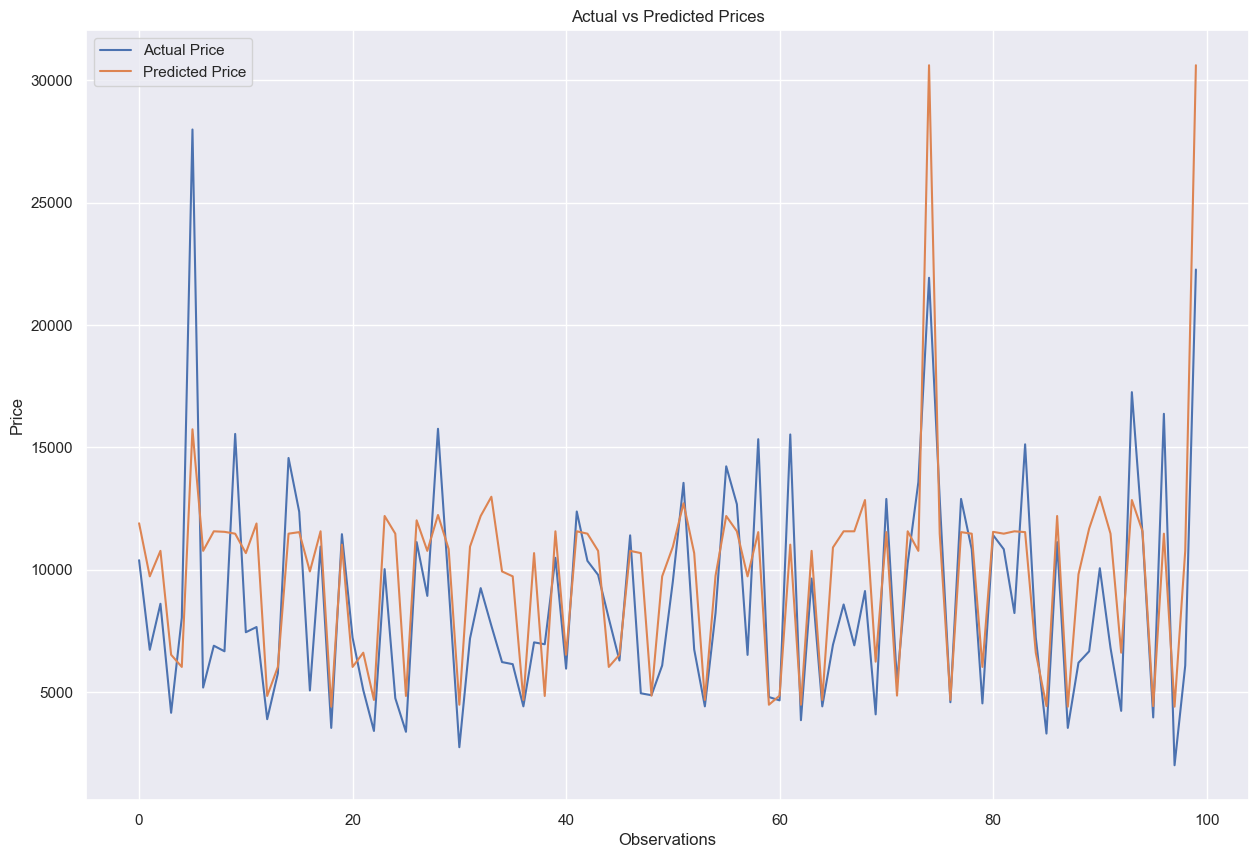

In [123]:
# Perform hyperparameter tuning and feature selection for AdaBoostRegressor
ab = AdaBoostRegressor()
pred_model(ab, param_grid_ab)

In [124]:
# Display the results using pandas DataFrame
Technique = ["GradientBoostingRegressor", " AdaBoostRegressor"]
results = pd.DataFrame({'Model': Technique, 'Accuracy(Train)': train_scores, 'Accuracy(Test)': test_scores})
display(results)

Model  Accuracy(Train)  Accuracy(Test)
0  GradientBoostingRegressor             0.90            0.80
1          AdaBoostRegressor             0.57            0.52